In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from scipy import stats
from sklearn import tree
import scipy.stats as ttest_ind
import scipy.stats as shapiro
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import warnings 
warnings.filterwarnings("ignore")

In [3]:
class Information():
    def __init__(self,data):
        self.data=data
        
    def Head(self):
        print(self.data.head())
              
    #Datanın belirli özelliklere göre açıklamasını çıkarma          
    def describe(self):
        print("Data Describe: \n",data.describe().T)

        
    #Data hakkında bilgileri almak için 
    def info():
        print("Data Info: ",data.info())
        print("Data Lenght: ", data.len())
    
    
    #Datamızdaki satır ve sütunların kontrolü 
    def columns(self):
        print("Data Columns: ",data.columns)

        
    #Datanın veri tipini görüntülem
    def columnTypes():
        print("Data Types: ", data.dtypes())
        
        
    def nullValues(self):
        print("Null Values (any): ", self.data.isnull().values.any())
        print("Null Values (sum): ", self.data.isnull().sum())
        
    def count(self):
        print("Count: ",self.data.count())
        
  
    def num_data(self):
        print(self.data.select_dtypes(include=['float64','int64']))        
        
    
    def cat_data(self):
        print(self.data.select_dtypes(include=["object"])) 
        
    #Datanın kaç satır ve sütundan oluştuğunu gösterme      
    def shape(self):
        print(data.shape)      
        
        
    def nullValues(self):
        print(self.data.isnull().values.any())
        print(self.data.isnull().sum())

        
class Visualization():    
    
    def __init__(self,filename):
        data = pd.read_csv(filename)
        
    def barPlot(self, columnName1, columnName2, columnName3 =None ):
        sns.barplot(x= columnName1, y= columnName2, hue=columnName3, data=data)
        plt.show()
        
    def scatterPlot(self, xLabel, yLabel, columnName1, columnName2):
        # 2 özellik arasındaki correlationı görmek için kullanılır
        df.plot(kind='scatter', x= columnName1, y= columnName2, color='orange', alpha='0.4')
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.title(xLabel +' - '+ yLabel)        
        
    def boxPlot(self, columnName):       
        sns.boxplot(data[columnName])
        plt.show()       
        
    def QQPlot(self, columnName):
        stats.probplot(columnName, dist="norm", plot=pylab)
        pylab.show()        
    
    def countPlot(self,title):
        sns.countplot(title, data=data)
        
    def pairPlot(self):
        sns.pairplot(data, kind="reg")
        sns.pairplot(data, kind="scatter")        

    def factorPlot(self, columnName1,columnName2, columnName3= None):
        sns.factorplot(columnName1,columnName2, hue=columnName3, data=data)
        plt.show()
        
    def histogram(self, xTitle,yTitle, columnName, bins =None):
        data[columnName].hist(bins = bins)
        
    def linePlot(self, columnName1):
        fmri = sns.load_dataset(columnName1)
        ax = sns.lineplot(x=xTitle, y=yTitle, data=fmri)
        
    def jointPlot(self, columnName1, columnName2):
        sns.jointplot(x=columnName1, y=columnName2, data=data, kind="reg")
        
    def corr(self):
        print(data.corr().head())
        
        f,ax = plt.subplots(figsize=(14,14))
        sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)        
        
    
    def probPlot(self, columnName):
        stats.probplot(data[columnName], dist="norm", plot=pylab)
        pylab.show()
    

    def subPlot(self, x,y, columnName1, columnName2, xTitle, yTitle, yLabel):
        
        fig, ax = plt.subplots(x, y, figsize = (18, 8))
        data[columnName1].value_counts().plot.bar(color = "blue", ax = ax[0])
        ax[0].set_title(yTitle)
        ax[0].set_ylabel(yLabel)
        sns.countplot(columnName1, hue = columnName2, data = data, ax = ax[1])
        ax[1].set_title(xTitle)
        plt.show()
        
    
    def violinPlot(self, x):
        sns.set(style="whitegrid")
        ax = sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")
        

class inf_stats(): 
    def __init__(self, data):
        self.data=data
        
    def corr(self):
        import seaborn as sns
        import matplotlib.pyplot as plt       
        fig,ax = plt.subplots(figsize=(7, 7))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        plt.show()

    def norm_test(self, column):
        import pylab
        import scipy.stats as stats
        from scipy.stats import shapiro
        
        print("H0: Data normally distributed\n")      
        
        
        stat, p= shapiro(self.data[column])
        print("Statistic= {} , p-val={}".format( stat, p))
        
        if p>0.05:
            print("H0-> Fail to Reject. Data is normally distributed.")
        else:
            print("H0-> Reject. Data is not normally distributed.")
        
        #Probability plot çizdirerek, görselleştirme de yapıyoruz.
        stats.probplot(self.data[column],dist='norm',plot=pylab)
        pylab.show()
        
    def t_test(self, popmean, column):
        import scipy.stats as stats 
        import statsmodels.stats.api as sms
         
        self.column=column
        self.popmean=popmean
        print("Hypothesis:\nH0:μ0={}\n".format(self.popmean))
        
        
        stat, pval=stats.ttest_1samp(self.data[self.column],popmean=self.popmean)
        print('RESULT=\nStatistics=%.3f,p-value=%.3f' % (stat,pval))
        
        
        cf=sms.DescrStatsW(self.data[self.column]).tconfint_mean()
        print("Confidence Interval={}\n".format(cf))
        
        if pval<0.05:
            print("Reject H0 --> μ0≠{}". format(self.popmean))
        else:
            print("Fail to reject H0 --> μ0={}". format(self.popmean))
     
    def num_cat(self,cl1,cl2):
        import pandas as pd 
        import numpy as np 
        from scipy.stats import shapiro 
        A=Series(self.data[cl1].iloc[:][data[cl2]==1])
        B=Series(self.data[cl1].iloc[:][data[cl2]==0])
   
        print("H0:{}-{}=1 and {}-{} =0 have same distribution\n".format(cl1,cl2,cl1,cl2))
        import scipy
        
        stat, p=scipy.stats.ks_2samp(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different distribution\n")
        else:
            print("H0--> Fail to Reject.\n")
        
        import scipy.stats as stats
        
        print("VARIANCE:")
        print("HİPOTEZ:")
        print("H0:'{}' and '{}' have same variance\n".format(cl1,cl2))
        
        stat, p=stats.levene(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different variance\n")
        else:
            print("H0--> Fail to Reject.")
            
        if p<0.05:
            equal_var=False
        else:
            equal_var=True
        print("MEAN:")
        stat, p=stats.ttest_ind(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different mean\n")
        else:
            print("H0--> Fail to Reject.")
            
    def chi2(self,cl1,cl2):
        import scipy.stats 
        cross=pd.crosstab(index=self.data[cl2], columns=self.data[cl1])
        from numbers import Number
        chi2,p,dof,expected= scipy.stats.chi2_contingency(cross)
        result=[["chi",chi2],["p",p]]
        print(result)

    
    
    def box_2samp(self,cl1,cl2):
        import matplotlib.pyplot as plt
        import seaborn as sns
        figg=plt.figure(figsize=(5,5))
        sns.boxplot(x=data[cl1],y=data[cl2])
        

class PreProcessing:
    
    def __init__(self, data):
        self.data = data
        
    def dropna(self):
        return self.data.dropna()

    def Delete_col(self, inplace):
        del_col = self.data.dropna(axis=1, inplace=inplace)
        return del_col
    
    def Delete_row(self, inplace):
        del_row = self.data.dropna(axis=0, inplace=inplace)
        return del_row
    
    def calc_vif(self):
        vif["variables"] = self.data.columns
        vif["VIF"] = [variance_inflation_factor(self.data.values, i) for i in range(self.data.shape[1])]
        return(vif)

    def Dummy(self):
        dummy_data = pd.get_dummies(self.data)
        return dummy_data
    
    def normalization(self):
        return preprocessing.normalize(self.data)
    
    def outlier(self):
        lower_and_upper = {}
        columns = list(self.data.select_dtypes(include=["float64","int64"]))
        for col in columns:
            q1 = self.data[col].quantile(0.25)
            q3 = self.data[col].quantile(0.75)
            iqr = 1.5*(q3-q1)
    
            lower_bound = q1-iqr
            upper_bound = q3+iqr
    
            lower_and_upper[col] = (lower_bound, upper_bound)
            self.data.loc[(self.data.loc[:,col]<lower_bound),col]=lower_bound
            self.data.loc[(self.data.loc[:,col]>upper_bound),col]=upper_bound
         
        return self.data

Data Description

Bad = 0 ödenmemiş , 1 ödenmiş
Loan : Kredi talebi tutarı
Mortdue : Mevcut borç
Value : Mevcut mülk degeri
Reason : DebtCon= borç ödemek için / HomeImp = ev kredisi
Job : Müşterinin işi
Yoj : Müşterinin işindeki senesi
Derog : Raporların sayısı
Delinq : Ödenmemiş kredi limit sayısı
Clage : En eski kredi limitinin yaşı
Ninq : Güncel son kredi sorgusunun sayısı
Clnq : kredi limit sayısı
Debtinc : Borç / Gelir orani

13 adet değişken içerir ve bunların 2 tanesi kategorik,11 tanesi numerik değişkenlerdir.

# DATA INFO

In [4]:
data=pd.read_csv("hmelq.csv")
data_information=Information(data)
data_information.info_data()
data_information.describe_missing_values()
data_information.select_dtypes_numeric()
data_information.describe_data()
data_information.select_dtypes_category()

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   obje

# DATA VIZUALIZATION

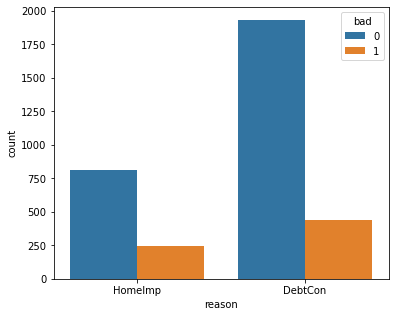

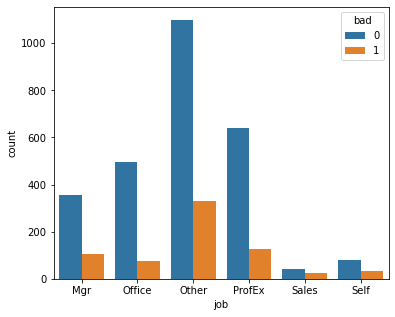

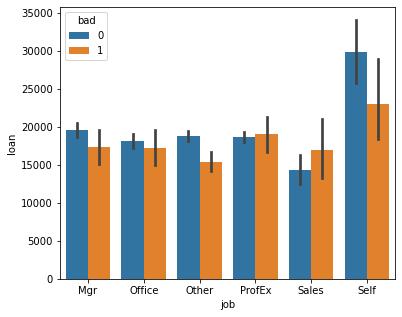

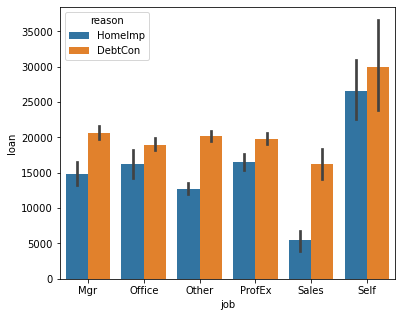

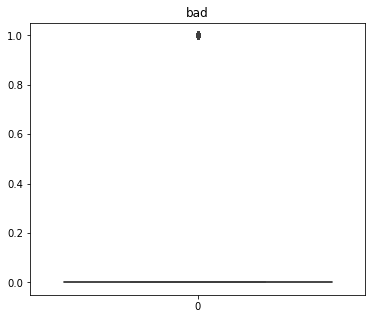

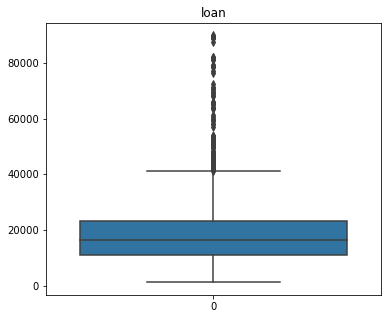

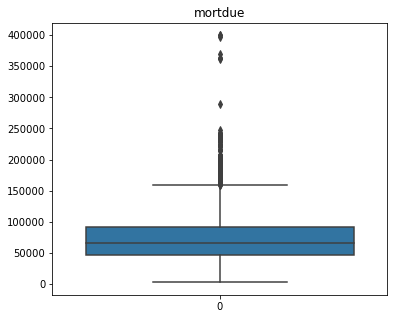

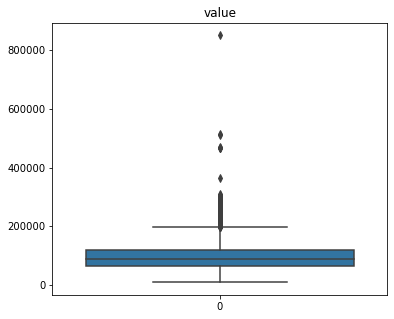

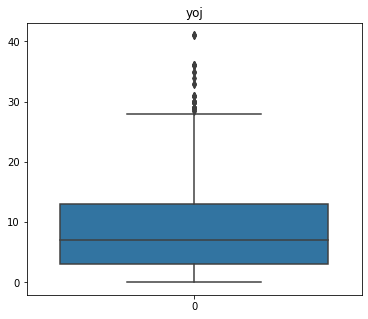

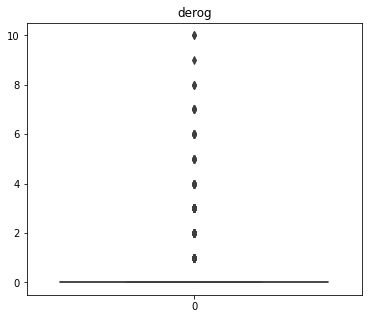

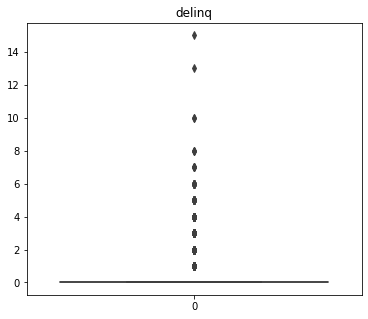

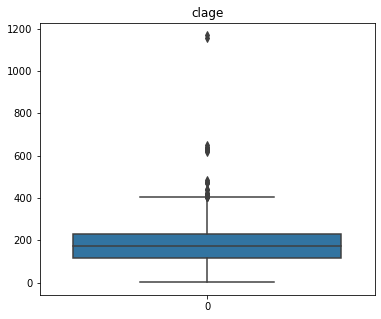

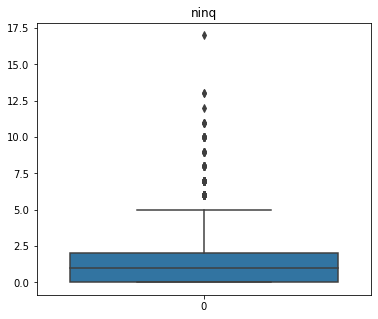

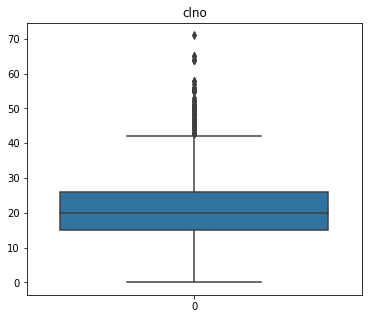

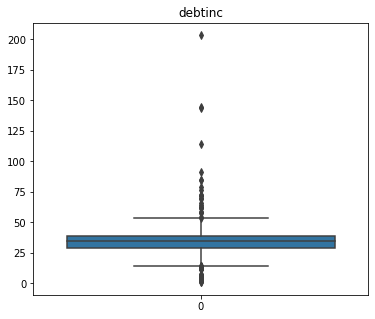

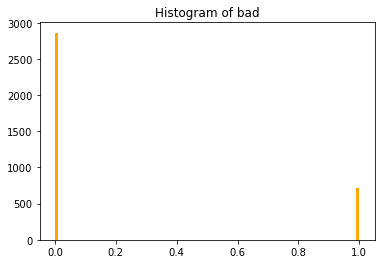

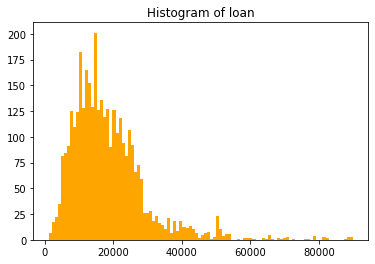

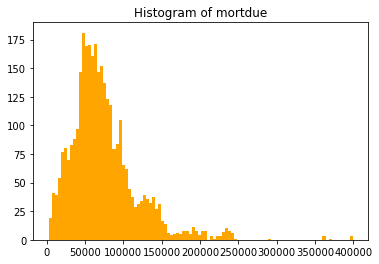

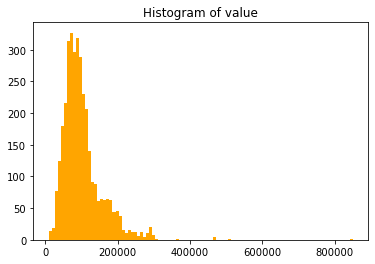

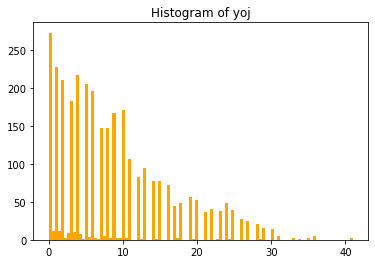

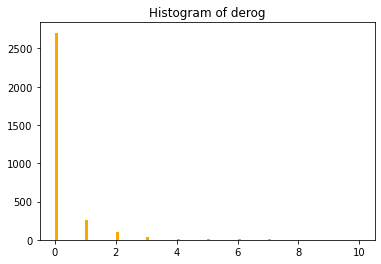

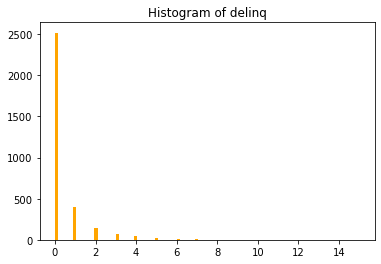

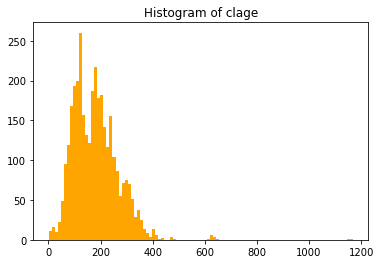

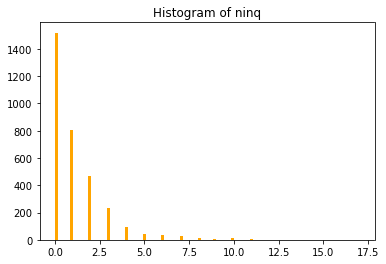

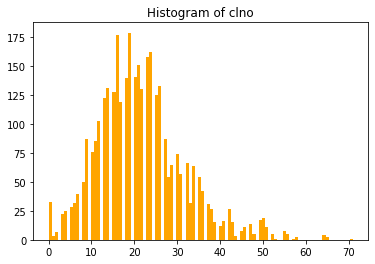

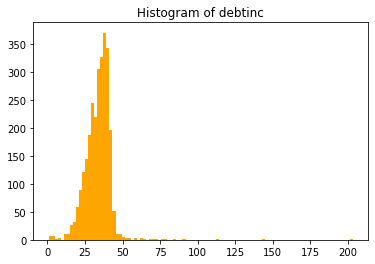

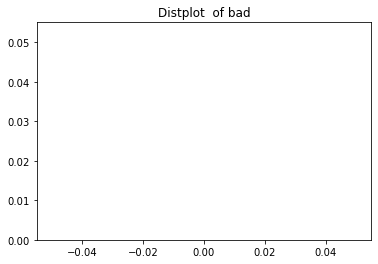

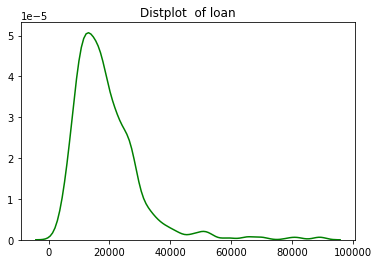

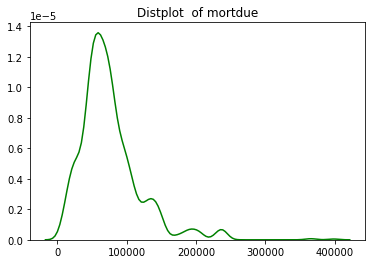

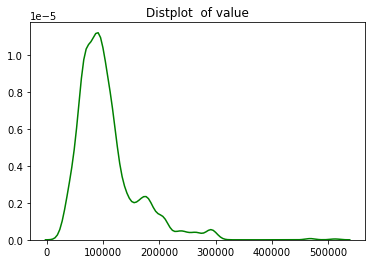

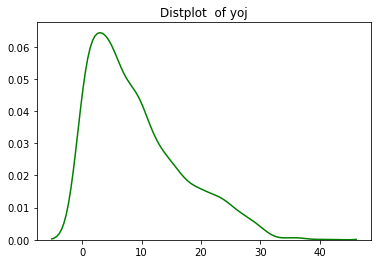

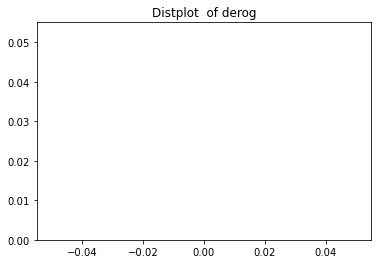

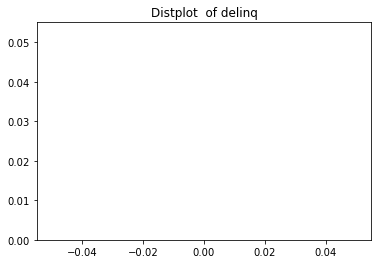

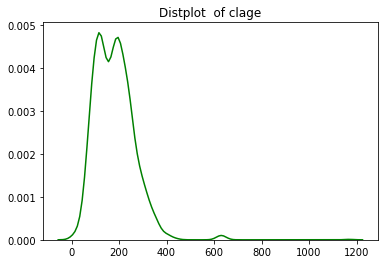

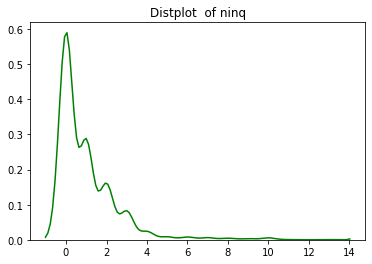

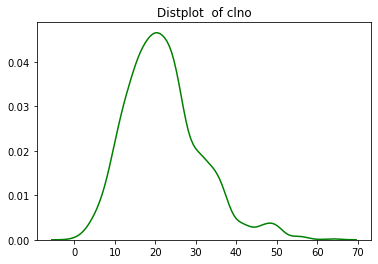

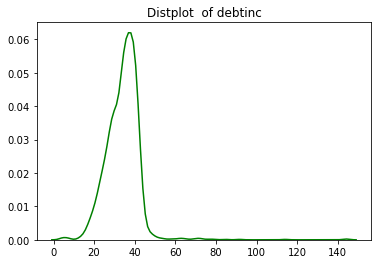

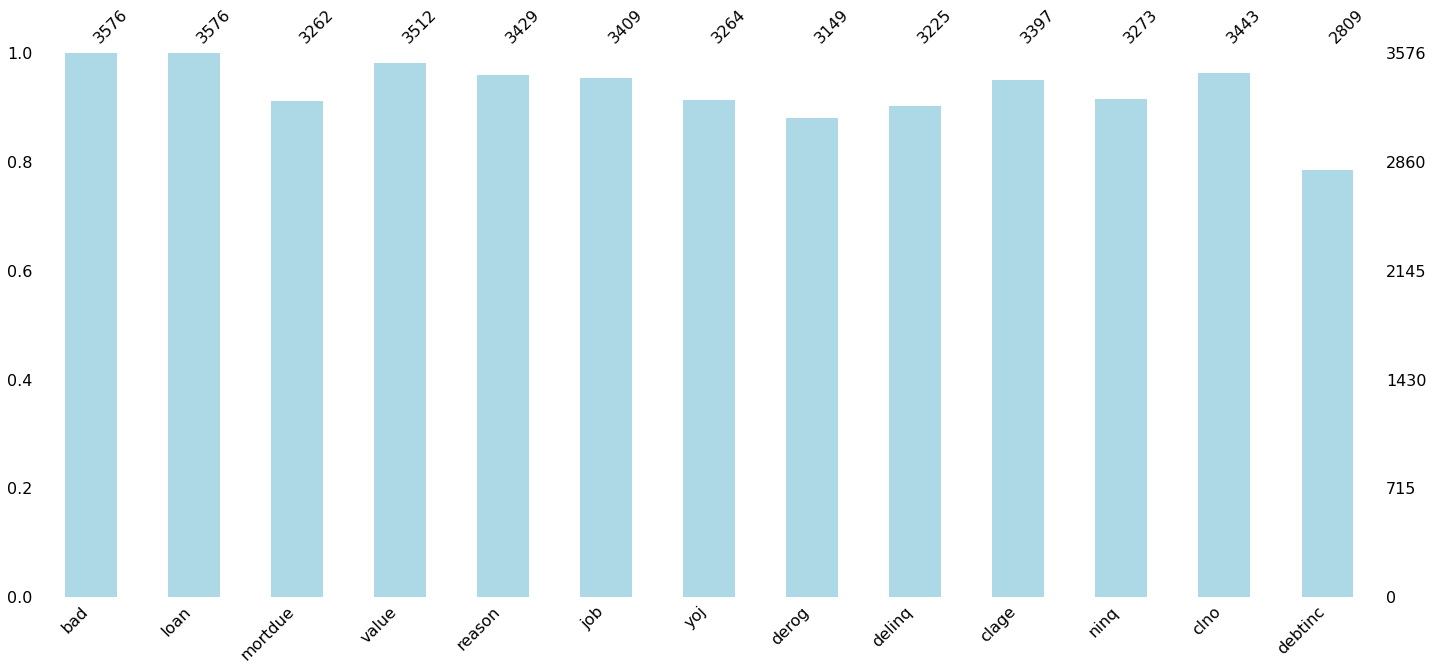

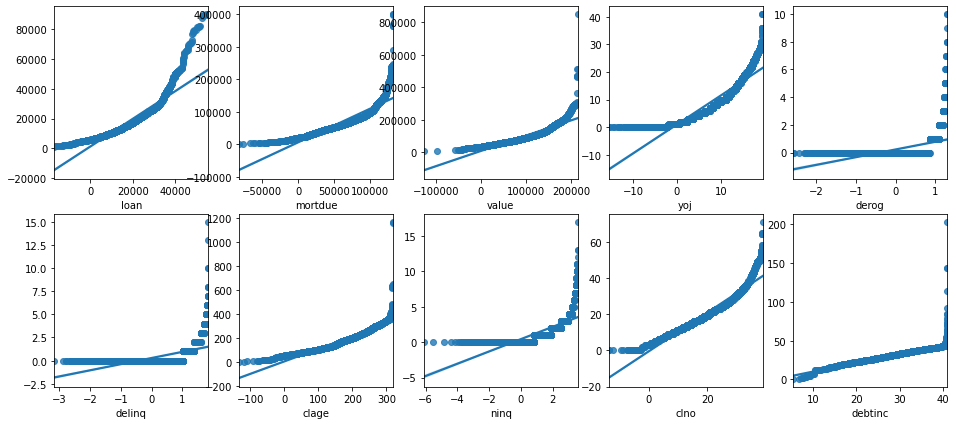

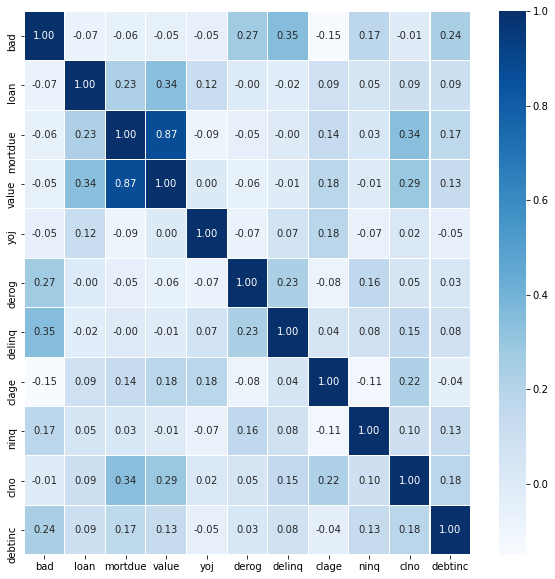

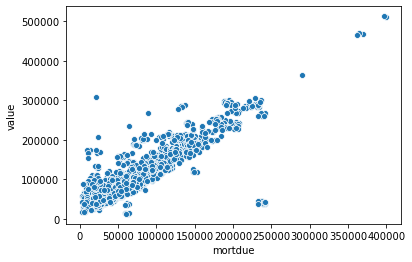

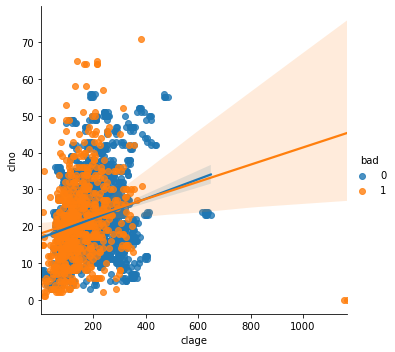

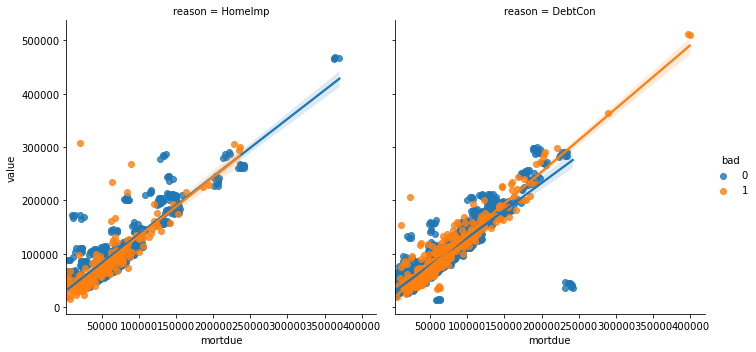

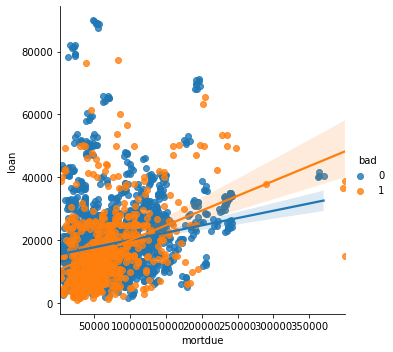

In [5]:
data_visualization=Visualizer(data)
data_visualization.count_plot(x="reason",z="bad")
data_visualization.count_plot(x="job",z="bad")
data_visualization.bar_plot(x="job",y="loan",z="bad")
data_visualization.bar_plot(x="job",y="loan",z="reason")
data_visualization.box_plot()
data_visualization.hist_plot()
data_visualization.dist_plot()
data_visualization.msno_bar()
data_visualization.reg_plot()
data_visualization.correlation()
data_visualization.scatter_plot(x="mortdue",y="value")
data_visualization.lm_plot(x="clage", y="clno", z="bad")
data_visualization.lm_plot(x="mortdue", y="value", z="bad",w= "reason")
data_visualization.lm_plot(x="mortdue", y="loan", z="bad")

# H TEST

In [6]:
hypothesis_testing=HypothesisTesting(data)
hypothesis_testing.normality_assumption()
hypothesis_testing.assumption_of_variance_homogeneity(variable="bad",x=1,y=0)
hypothesis_testing.two_independent_samples_t_test(variable="bad",x=1,y=0)
hypothesis_testing.chi_square_t_test(x="bad",y="job")

Statistics:0.489, p=0.000 
bad  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.849, p=0.000 
loan  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.882, p=0.000 
mortdue  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.848, p=0.000 
value  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.904, p=0.000 
yoj  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.338, p=0.000 
derog  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.450, p=0.000 
delinq  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.920, p=0.000 
clage  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.691, p=0.000 
ninq  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.966, p=0.000 
clno  için Orneklem Normal (Gaussian) Dagilimdan 

# LOGISTIC

In [7]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [8]:
dms=pd.get_dummies(df[["job","reason"]])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


In [9]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,reason_DebtCon
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,1
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,1
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,1
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,1


In [10]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Scikit-Learn 

In [14]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(C=0.1,solver = "newton-cg") 
loj_model = loj.fit(X_train,y_train)
loj_model
# modeli train setine kurdun fit ettin
# farklı solverlar ile model kurma kolaylığı var

LogisticRegression(C=0.1, solver='newton-cg')

In [15]:
y_pred_train = loj_model.predict(X_train)
# train setini verdik Tahmin değerlerini çektik.

In [16]:
accuracy_score(y_train, y_pred_train)

0.9237918215613383

In [17]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1471
           1       0.81      0.18      0.30       143

    accuracy                           0.92      1614
   macro avg       0.87      0.59      0.63      1614
weighted avg       0.92      0.92      0.90      1614



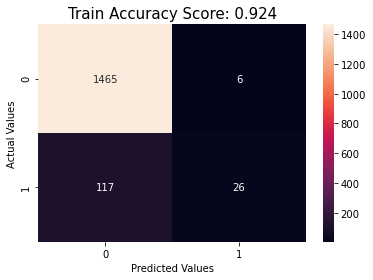

In [18]:
from sklearn.metrics import confusion_matrix as cm
predictions = loj_model.predict(X_train)
score = round(accuracy_score(y_train, predictions), 3)
cm1 = cm(y_train, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Train Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [19]:
loj_model.intercept_
# B0 değerini çektin

array([-3.05672963])

In [20]:
loj_model.coef_
# Katsayıları aldın

array([[-1.98874039e-05, -3.51619995e-07,  1.96674952e-06,
        -1.87275775e-02,  3.96294627e-01,  7.08285181e-01,
        -5.29560570e-03,  9.11140508e-02, -2.65063113e-02,
         6.60596499e-02, -1.45203987e-01, -4.07580591e-01,
        -2.73663326e-01, -2.34924176e-01,  3.96866829e-02,
        -7.40110581e-02]])

# Lojistik Regresyon Tahmin & Model Tuning

In [21]:
loj_model

LogisticRegression(C=0.1, solver='newton-cg')

In [22]:
y_pred = loj_model.predict(X_test)

In [23]:
confusion_matrix(y_test, y_pred)

array([[368,   1],
       [ 31,   4]], dtype=int64)

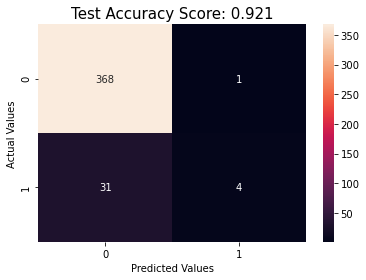

In [24]:
from sklearn.metrics import confusion_matrix as cm
predictions = loj_model.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Test Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [25]:
accuracy_score(y_test, y_pred)

0.9207920792079208

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       0.80      0.11      0.20        35

    accuracy                           0.92       404
   macro avg       0.86      0.56      0.58       404
weighted avg       0.91      0.92      0.89       404



In [27]:
loj_model.predict_proba(X_test)[0:10][:,0:2]

array([[0.93888435, 0.06111565],
       [0.90916287, 0.09083713],
       [0.9664996 , 0.0335004 ],
       [0.97676791, 0.02323209],
       [0.90475724, 0.09524276],
       [0.94617616, 0.05382384],
       [0.89332992, 0.10667008],
       [0.9237066 , 0.0762934 ],
       [0.98241798, 0.01758202],
       [0.96156326, 0.03843674]])

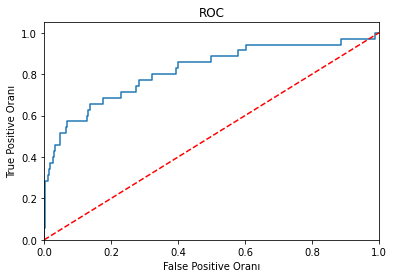

In [29]:
# ROC eğrisi 
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

# Decision Tree Classifier

In [32]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [33]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [34]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [37]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)

In [38]:
cart_model

DecisionTreeClassifier()

In [39]:
! pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((1 if x[1] <= 44016.5 else (0 if x[5] <= 2.0 else 1) if x[2] <= 121579.0
     else 1) if x[0] <= 5550.0 else 1 if x[8] <= 2.5 else (((((((0 if x[6] <=
    334.97499084472656 else 1) if x[10] <= 0.5 else 1 if x[6] <= 
    228.77999877929688 else 0) if x[1] <= 38711.0 else (1 if x[6] <= 
    44.82000160217285 else ((((0 if x[2] <= 67278.5 else 1 if x[9] <= 
    37.37649917602539 else 0) if x[10] <= 0.5 else 0) if x[11] <= 0.5 else 
    1 if x[1] <= 70377.5 else 0) if x[6] <= 101.5 else 1) if x[6] <= 
    101.8499984741211 else (0 if x[0] <= 6050.0 else 1) if x[0] <= 6150.0 else
    0) if x[4] <= 1.5 else 0 if x[0] <= 6550.0 else 1) if x[0] <= 10050.0 else
    ((0 if x[12] <= 0.5 else 1) if x[6] <= 58.3700008392334 else 1) if x[6] <=
    61.2549991607666 else (0 if x[3] <= 12.0 else 1 if x[0] <= 28400.0 else
    0) if x[8] <= 7.5 else ((1 if x[6] <= 234.17000579833984 else 0) if x[1
    ] <= 32765.5 else ((0 if x[9] <= 36.967498779296875 else 1 if x[9] <= 
    37.06449890136719 else ((

In [40]:
y_pred=cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.941696113074205

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       519
           1       0.65      0.66      0.65        47

    accuracy                           0.94       566
   macro avg       0.81      0.81      0.81       566
weighted avg       0.94      0.94      0.94       566



In [42]:
decision_tree_classifier_grid={"max_depth": range(1,15),
           "criterion":["gini","entropy"],
          "min_samples_split":list(range(2,50))}

In [43]:
cart=tree.DecisionTreeClassifier()
cart_cv=GridSearchCV(cart,decision_tree_classifier_grid,cv=10,n_jobs=-1,verbose=2)
cart_cv_model=cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 4320 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 8848 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 13413 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 13440 out of 13440 | elapsed:   41.2s finished


In [44]:
print("En iyi parametreler:"+str(cart_cv_model.best_params_))

En iyi parametreler:{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}


# Model Tuning

In [46]:
cart_classifier=tree.DecisionTreeClassifier(max_depth=8,min_samples_split=3,criterion="entropy")

In [47]:
cart_tuned=cart_classifier.fit(X_train,y_train)

In [48]:
y_pred_tuned=cart_tuned.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred_tuned)

0.941696113074205

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       519
           1       0.65      0.66      0.65        47

    accuracy                           0.94       566
   macro avg       0.81      0.81      0.81       566
weighted avg       0.94      0.94      0.94       566



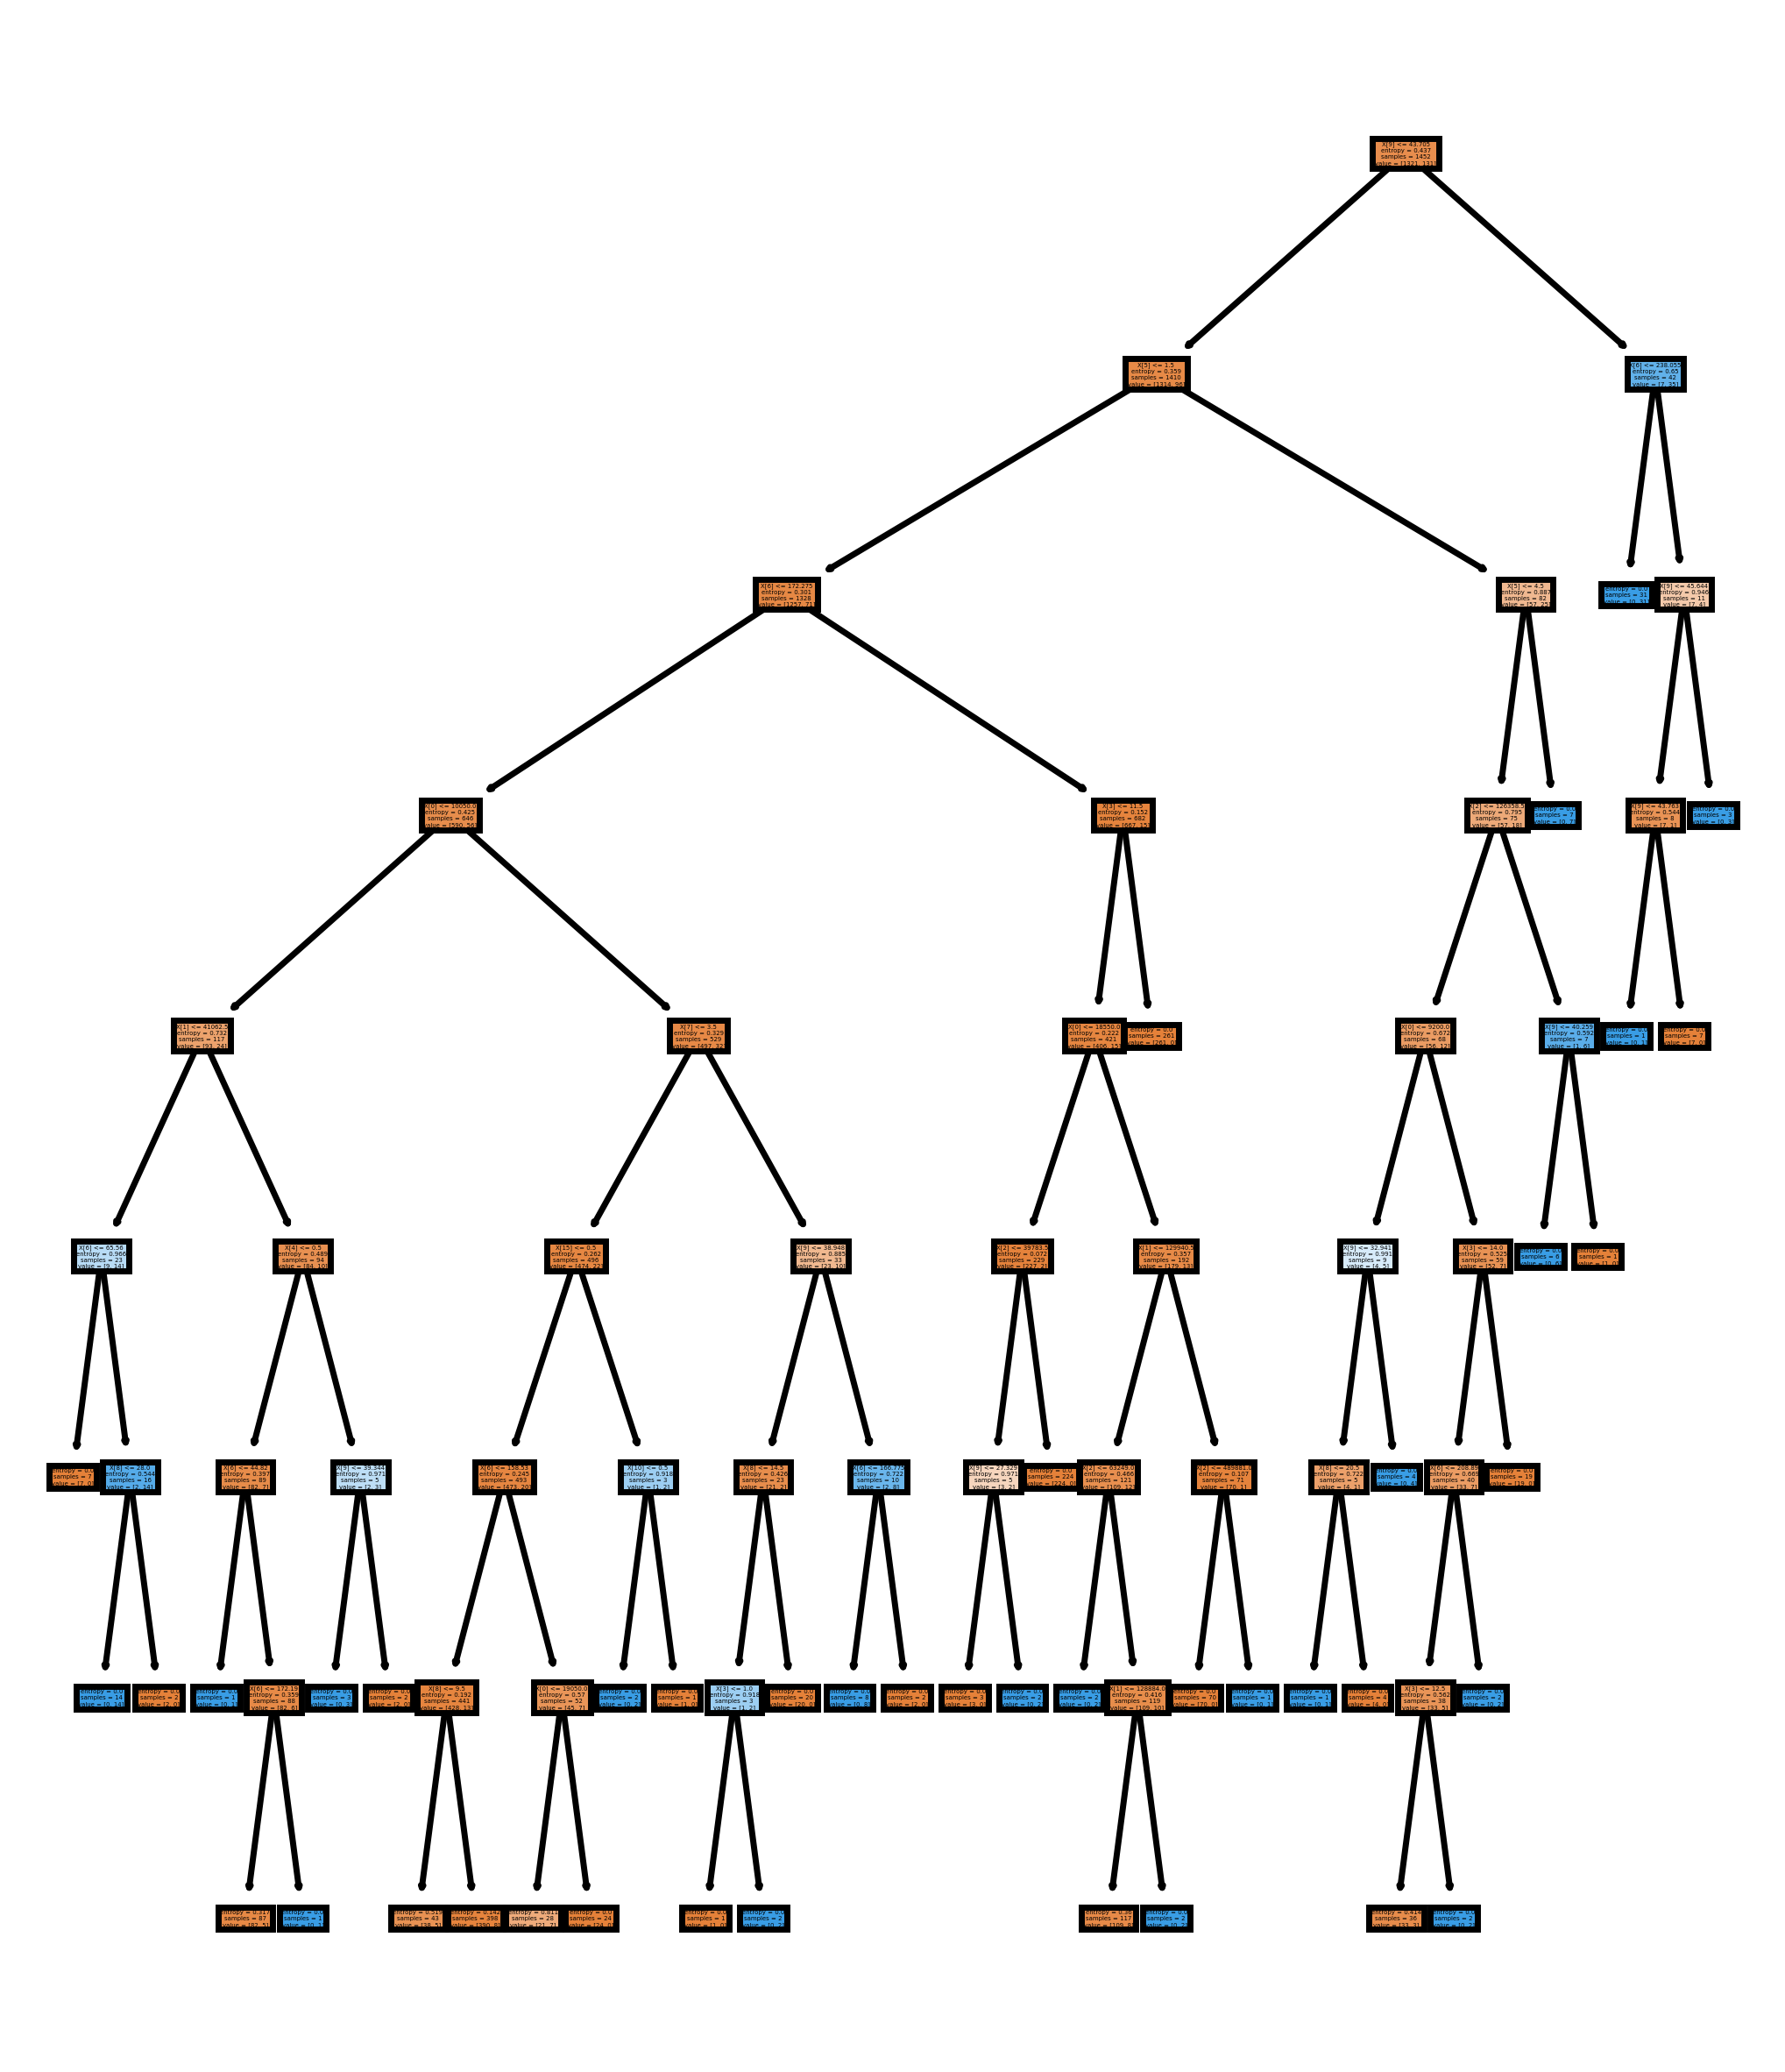

In [51]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,6), dpi=500)
tree.plot_tree(cart_tuned,filled = True);

In [52]:
text_representation = tree.export_text(cart_tuned)
print(text_representation)

|--- feature_9 <= 43.70
|   |--- feature_5 <= 1.50
|   |   |--- feature_6 <= 172.28
|   |   |   |--- feature_0 <= 10050.00
|   |   |   |   |--- feature_1 <= 41062.50
|   |   |   |   |   |--- feature_6 <= 65.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  65.56
|   |   |   |   |   |   |--- feature_8 <= 28.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 >  28.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  41062.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 44.82
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  44.82
|   |   |   |   |   |   |   |--- feature_6 <= 172.19
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  172.19
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- feature_9 <= 39.34
|   |   |   |  

In [55]:
!pip install dtreeviz
#!apt-get install graphviz

In [56]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        19:53:22   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [57]:
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [58]:
cart2=DecisionTreeClassifier()
cart_model2=cart2.fit(X_train,y_train)

In [59]:
y_pred=cart_model2.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred)

0.9028268551236749

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       519
           1       0.41      0.40      0.41        47

    accuracy                           0.90       566
   macro avg       0.68      0.68      0.68       566
weighted avg       0.90      0.90      0.90       566



In [63]:
decision_tree_classifier_grid2={"max_depth": range(1,10),
           "criterion":["gini","entropy"],
          "min_samples_split":list(range(2,50))}

In [64]:
cart=tree.DecisionTreeClassifier()
cart_cv2=GridSearchCV(cart,decision_tree_classifier_grid2,cv=10,n_jobs=-1,verbose=2)
cart_cv_model2=cart_cv2.fit(X_train,y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 4800 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 8608 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:   13.7s finished


In [65]:
print("En iyi parametreler:"+str(cart_cv_model2.best_params_))

En iyi parametreler:{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 17}


# Model Tuning

In [67]:
cart_classifier2=tree.DecisionTreeClassifier(max_depth=3,min_samples_split=17,criterion="gini")

In [68]:
cart_tuned2=cart_classifier2.fit(X_train,y_train)

In [69]:
y_pred=cart_tuned2.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred)

0.9240282685512368

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       519
           1       0.70      0.15      0.25        47

    accuracy                           0.92       566
   macro avg       0.81      0.57      0.60       566
weighted avg       0.91      0.92      0.90       566



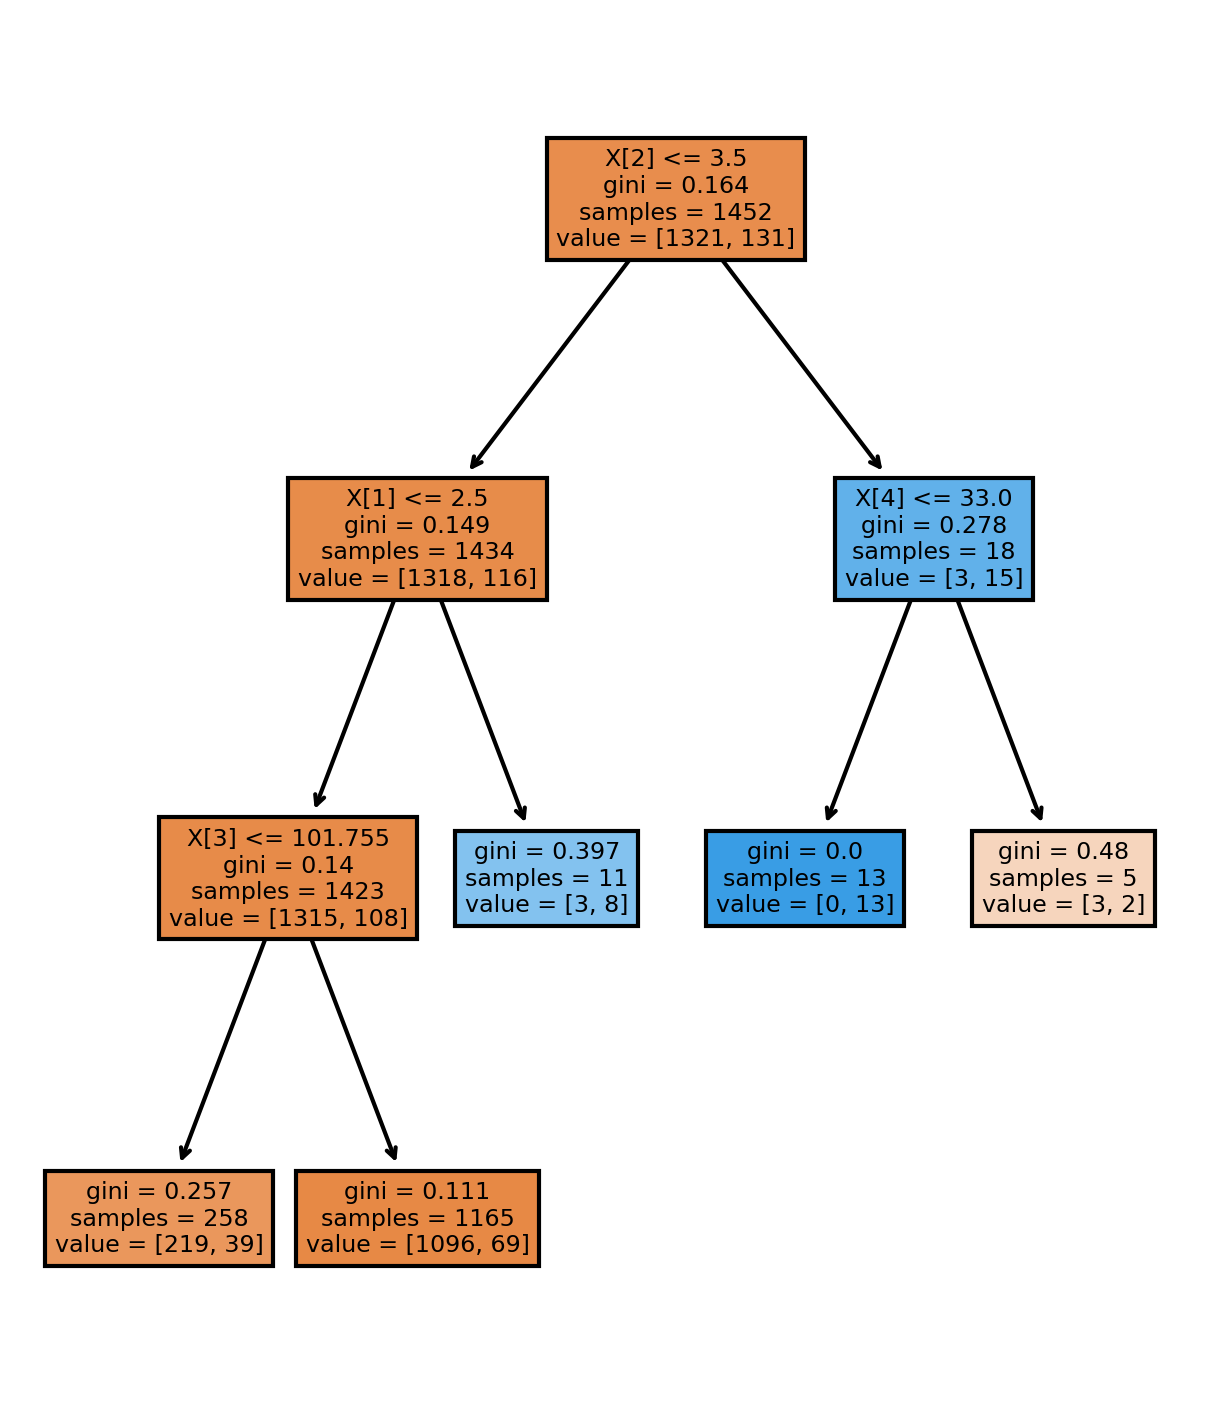

In [72]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,6), dpi=300)
tree.plot_tree(cart_tuned2,
               filled = True);

In [73]:
text_representation = tree.export_text(cart_tuned2)
print(text_representation)

|--- feature_2 <= 3.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_3 <= 101.76
|   |   |   |--- class: 0
|   |   |--- feature_3 >  101.76
|   |   |   |--- class: 0
|   |--- feature_1 >  2.50
|   |   |--- class: 1
|--- feature_2 >  3.50
|   |--- feature_4 <= 33.00
|   |   |--- class: 1
|   |--- feature_4 >  33.00
|   |   |--- class: 0



# Random Forest Classification

In [74]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [75]:
rf_model=RandomForestClassifier().fit(X_train,y_train)

In [76]:
rf_model

RandomForestClassifier()

In [77]:
y_pred=rf_model.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred)

0.9575971731448764

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       1.00      0.49      0.66        47

    accuracy                           0.96       566
   macro avg       0.98      0.74      0.82       566
weighted avg       0.96      0.96      0.95       566



# Model Tuning

In [81]:
rf_params={"max_depth":[2,3,5,8,10],
          "max_features":[0.1,0.25,0.625,0.5], # 2,5,8,10
          "n_estimators":[10,200,500,1000],
          "min_samples_split":[5,10,15]}# göz öünde bulunacak olan degsken sayısı

In [82]:
rf_cv_model=GridSearchCV(rf_model,
                       rf_params,
                       cv=10,
                       n_jobs=-1,verbose=2)

In [83]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1993 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  8.8min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10],
                         'max_features': [0.1, 0.25, 0.625, 0.5],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [10, 200, 500, 1000]},
             verbose=2)

In [85]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 0.625,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [86]:
rf_tuned=RandomForestClassifier(max_depth= 8,
 max_features=0.5,
 min_samples_split= 10,
 n_estimators= 500)

In [89]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.5, min_samples_split=10,
                       n_estimators=500)

In [90]:
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9469964664310954

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       519
           1       0.87      0.43      0.57        47

    accuracy                           0.95       566
   macro avg       0.91      0.71      0.77       566
weighted avg       0.94      0.95      0.94       566



Text(0.5, 0, 'Degiskenlerin Önem Düzeyleri')

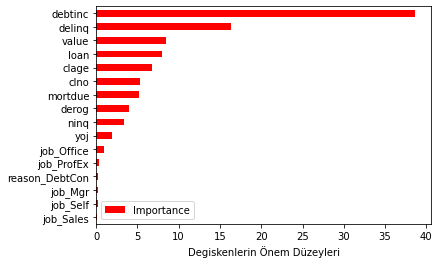

In [92]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")

plt.xlabel("Degiskenlerin Önem Düzeyleri")

In [93]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        20:07:19   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [94]:
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [95]:
rf_model2=RandomForestClassifier().fit(X_train,y_train)

In [96]:
rf_model2

RandomForestClassifier()

In [97]:
y_pred=rf_model2.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred)

0.9257950530035336

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       519
           1       0.73      0.17      0.28        47

    accuracy                           0.93       566
   macro avg       0.83      0.58      0.62       566
weighted avg       0.91      0.93      0.90       566



# Model Tuning

In [101]:

rf_params2={"max_depth":[2,3,5,8,10],
          "max_features":[0.1,0.25,0.625,0.5], # 2,5,8,10
          "n_estimators":[10,200,500,1000],
          "min_samples_split":[5,10,15]}# göz öünde bulunacak olan degsken sayısı

In [102]:
rf_cv_model2=GridSearchCV(rf_model2,
                       rf_params2,
                       cv=10,
                       n_jobs=-1,verbose=2)

In [103]:
rf_cv_model2.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1993 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  6.6min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10],
                         'max_features': [0.1, 0.25, 0.625, 0.5],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [10, 200, 500, 1000]},
             verbose=2)

In [104]:
rf_cv_model2.best_params_

{'max_depth': 10,
 'max_features': 0.625,
 'min_samples_split': 5,
 'n_estimators': 10}

In [105]:
rf_tuned=RandomForestClassifier(max_depth=10,
 max_features=0.25,
 min_samples_split= 5,
 n_estimators= 10)

In [106]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=0.25, min_samples_split=5,
                       n_estimators=10)

In [107]:
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9134275618374559

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       519
           1       0.38      0.06      0.11        47

    accuracy                           0.91       566
   macro avg       0.65      0.53      0.53       566
weighted avg       0.88      0.91      0.88       566



Text(0.5, 0, 'Degiskenlerin Önem Düzeyleri')

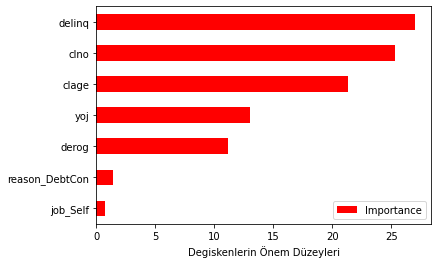

In [109]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")

plt.xlabel("Degiskenlerin Önem Düzeyleri")

# Neural Network (Classification

In [110]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [111]:
scaler=StandardScaler()

In [112]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [113]:
X_train_scaled[0:2]

array([[-1.1727471 , -0.11618344, -0.64160222, -0.80110944,  3.37508722,
        -0.32773572, -0.20397275, -0.65996532,  0.05958211,  0.69494165,
        -1.57279503, -0.40083845, -0.43831293, -0.58583337,  8.25486869,
        -0.18087821],
       [ 1.60101229,  2.90412576,  2.93054431, -0.932205  ,  1.55261543,
        -0.32773572,  0.67725196, -0.65996532,  1.00680723, -0.29989362,
         0.63581076, -0.40083845, -0.43831293,  1.70697001, -0.12114063,
        -0.18087821]])

In [114]:
mlpc=MLPClassifier().fit(X_train_scaled,y_train)

In [115]:
mlpc.coefs_

[array([[-0.41125923, -0.18591725,  0.1552554 , ...,  0.3125689 ,
          0.49860272, -0.07905391],
        [ 0.22619709,  0.32920223, -0.27476179, ..., -0.38182252,
         -0.30781812, -0.26209492],
        [ 0.27249103,  0.00818772,  0.18028414, ...,  0.00518696,
          0.11903166,  0.25962713],
        ...,
        [ 0.25426702, -0.01722484,  0.37637995, ...,  0.26966434,
         -0.38220657, -0.2918109 ],
        [-0.15958714, -0.04924549,  0.08755807, ..., -0.10173627,
          0.09995749, -0.38197865],
        [-0.08690151, -0.13204246, -0.29386366, ..., -0.04861587,
          0.25795571, -0.4241648 ]]),
 array([[-0.36947394],
        [-0.17767284],
        [-0.61925427],
        [-0.49215254],
        [ 0.20864897],
        [ 0.20915829],
        [ 0.61938132],
        [-0.3724812 ],
        [-0.3101026 ],
        [ 0.15796165],
        [ 0.26016536],
        [-0.40126443],
        [-0.22546168],
        [ 0.23435698],
        [ 0.35912424],
        [ 0.42719648],
     

In [116]:
dir(mlpc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_n_features',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_partial_fit',
 '_predict',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha',
 'batch

In [117]:
y_pred=mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9558303886925795

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       0.96      0.49      0.65        47

    accuracy                           0.96       566
   macro avg       0.96      0.74      0.81       566
weighted avg       0.96      0.96      0.95       566



In [119]:
mlpc

MLPClassifier()

In [120]:
mlpc_params={"alpha":[0.1,0.01,0.02,0.005,0.0001,0.00001],# ceza parametresi
            "hidden_layer_sizes":[(10,10,10),
                                 (100,100,100),
                                 (100,100),(3,5),(5,3)],
            "solver":["lbfgs","adam","sgd"],
            "activation":["relu","logistic"]}#activation function

In [121]:
mlpc=MLPClassifier()
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,
                          cv=10,n_jobs=-1,
                          verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  8.7min finished


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [122]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (100, 100, 100),
 'solver': 'lbfgs'}

In [123]:
mlpc_tuned=MLPClassifier(alpha=0.1,
                        hidden_layer_sizes=(100,100),
                        solver="adam",
                        activation="relu")

In [124]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100))

In [125]:
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9469964664310954

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       519
           1       0.77      0.51      0.62        47

    accuracy                           0.95       566
   macro avg       0.87      0.75      0.79       566
weighted avg       0.94      0.95      0.94       566



In [128]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        20:38:51   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [129]:
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [130]:
scaler=StandardScaler()

In [131]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [132]:
mlpc=MLPClassifier().fit(X_train_scaled,y_train)
mlpc

MLPClassifier()

In [133]:
y_pred=mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9222614840989399

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       519
           1       0.67      0.13      0.21        47

    accuracy                           0.92       566
   macro avg       0.80      0.56      0.59       566
weighted avg       0.90      0.92      0.90       566



# Model Tuning

In [136]:
mlpc_params={"alpha":[0.1,0.01,0.02,0.005,0.0001,0.00001],
            "hidden_layer_sizes":[(10,10,10),
                                 (100,100,100),
                                 (100,100),(3,5),(5,3)],
            "solver":["lbfgs","adam","sgd"],
            "activation":["relu","logistic"]}

In [137]:
mlpc=MLPClassifier()
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,
                          cv=10,n_jobs=-1,
                          verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  9.4min finished


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [138]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.02,
 'hidden_layer_sizes': (100, 100),
 'solver': 'adam'}

In [139]:
mlpc_tuned=MLPClassifier(alpha=0.0001,
                        hidden_layer_sizes=(100,100),
                        solver="adam",
                        activation="relu")

In [140]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100))

In [141]:
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9204946996466431

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       519
           1       0.55      0.23      0.33        47

    accuracy                           0.92       566
   macro avg       0.74      0.61      0.64       566
weighted avg       0.90      0.92      0.91       566



# Support Vector Classifier

In [143]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [144]:
svm_model=SVC(kernel="linear").fit(X_train,y_train)

In [145]:
svm_model

SVC(kernel='linear')

In [146]:
y_pred=svm_model.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred)

0.9222614840989399

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       1.00      0.06      0.12        47

    accuracy                           0.92       566
   macro avg       0.96      0.53      0.54       566
weighted avg       0.93      0.92      0.89       566



# model tuning 

In [149]:
svc_params={"C":np.arange(2,6),"kernel":["linear","rbf","poly"]}
svc=SVC()
svc_cv_model=GridSearchCV(svc,svc_params,
                         cv=10,n_jobs=-1,
                         verbose=2)

In [150]:
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 33.5min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([2, 3, 4, 5]),
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [151]:
print("En iyi parametreler "+ str(svc_cv_model.best_params_))

En iyi parametreler {'C': 4, 'kernel': 'linear'}


In [152]:
svc_tuned=SVC(kernel="linear",C=4).fit(X_train,y_train)

In [153]:
y_pred=svc_tuned.predict(X_test)

In [154]:
accuracy_score(y_test,y_pred)

0.9222614840989399

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       1.00      0.06      0.12        47

    accuracy                           0.92       566
   macro avg       0.96      0.53      0.54       566
weighted avg       0.93      0.92      0.89       566



In [157]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        21:47:15   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [158]:
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [159]:
svm_model2=SVC().fit(X_train,y_train)

In [160]:
svm_model2

SVC()

In [161]:
y_pred=svm_model2.predict(X_test)

In [162]:
accuracy_score(y_test,y_pred)

0.9169611307420494

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       0.00      0.00      0.00        47

    accuracy                           0.92       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.92      0.88       566



# Model Tuning

In [165]:
svc_params={"C":np.arange(2,6),"kernel":["linear","rbf","poly"]}
svc=SVC()
svc_cv_model2=GridSearchCV(svc,svc_params,
                         cv=10,n_jobs=-1,
                         verbose=2)

In [166]:
svc_cv_model2.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 11.2min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([2, 3, 4, 5]),
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [167]:
print("En iyi parametreler "+ str(svc_cv_model.best_params_))

En iyi parametreler {'C': 4, 'kernel': 'linear'}


In [168]:
svc_tuned=SVC(kernel="linear",C=4).fit(X_train,y_train)

In [169]:
accuracy_score(y_test,y_pred)

0.9169611307420494

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       0.00      0.00      0.00        47

    accuracy                           0.92       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.92      0.88       566



# Gaussian NaiveBayes 

In [172]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [173]:
naive_bayes=GaussianNB()
nb_model=naive_bayes.fit(X_train,y_train)
nb_model

GaussianNB()

In [174]:
nb_model.predict_proba(X_test)[0:10]

array([[0.98963159, 0.01036841],
       [0.95812052, 0.04187948],
       [0.98719469, 0.01280531],
       [0.98387972, 0.01612028],
       [0.99665449, 0.00334551],
       [0.97490409, 0.02509591],
       [0.98651082, 0.01348918],
       [0.9746092 , 0.0253908 ],
       [0.40149679, 0.59850321],
       [0.99492648, 0.00507352]])

In [175]:
y_pred=nb_model.predict(X_test)

In [176]:
accuracy_score(y_test,y_pred)

0.9028268551236749

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       519
           1       0.36      0.21      0.27        47

    accuracy                           0.90       566
   macro avg       0.64      0.59      0.61       566
weighted avg       0.88      0.90      0.89       566



In [178]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.9257832080200501

In [179]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        22:01:10   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [180]:
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [181]:
naive_bayes=GaussianNB()
nb_model=naive_bayes.fit(X_train,y_train)
nb_model

GaussianNB()

In [182]:
y_pred=nb_model.predict(X_test)

In [183]:
accuracy_score(y_test,y_pred)

0.8657243816254417

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       519
           1       0.24      0.28      0.25        47

    accuracy                           0.87       566
   macro avg       0.58      0.60      0.59       566
weighted avg       0.88      0.87      0.87       566



# Multinominal Naive Bayes

In [186]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [187]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)
mnb_model

MultinomialNB()

In [188]:
y_pred = mnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.4416961130742049

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.43      0.59       519
           1       0.08      0.53      0.14        47

    accuracy                           0.44       566
   macro avg       0.49      0.48      0.36       566
weighted avg       0.84      0.44      0.55       566



In [191]:
cross_val_score(mnb_model, X_test, y_test, cv=10).mean()

0.5708333333333333

In [192]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        22:01:32   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [193]:
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [194]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)
mnb_model

MultinomialNB()

In [195]:
y_pred = mnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8833922261484098

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       519
           1       0.30      0.30      0.30        47

    accuracy                           0.88       566
   macro avg       0.62      0.62      0.62       566
weighted avg       0.88      0.88      0.88       566



In [197]:
cross_val_score(mnb_model, X_test, y_test, cv=10).mean()

0.8570488721804512

# Bernoulli Naive Bayes

In [199]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [200]:

bnb = BernoulliNB()
bnb_model = bnb.fit(X_train, y_train)
bnb_model

BernoulliNB()

In [201]:
y_pred = bnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.901060070671378

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       519
           1       0.00      0.00      0.00        47

    accuracy                           0.90       566
   macro avg       0.46      0.49      0.47       566
weighted avg       0.84      0.90      0.87       566



In [203]:
cross_val_score(bnb_model, X_test, y_test, cv=10).mean()

0.9152255639097744

In [204]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        22:01:34   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [205]:
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [206]:
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train, y_train)
bnb_model

BernoulliNB()

In [207]:
y_pred = bnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9134275618374559

In [208]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       519
           1       0.00      0.00      0.00        47

    accuracy                           0.91       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.91      0.88       566



In [209]:
cross_val_score(bnb_model, X_test, y_test, cv=10).mean()

0.9170112781954888

In [211]:
gnb_params = {"priors": [(0.1,0.9),(0.2,0.8),(0.3,0.7), (0.33,0.67), (0.5,0.5)]}

gnb = GaussianNB()
gnb_cv_model = GridSearchCV(gnb, gnb_params, cv=10, n_jobs=-1)
gnb_cv_model.fit(X_train, y_train)
print("En iyi skor     : ",gnb_cv_model.best_score_)
print("En iyi parametre: ",gnb_cv_model.best_params_)

En iyi skor     :  0.845692017005196
En iyi parametre:  {'priors': (0.5, 0.5)}


In [212]:
gnb = GaussianNB(priors=(0.5,0.5))

In [213]:
gnb_model=gnb.fit(X_train, y_train)

In [214]:
y_pred = gnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.842756183745583

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       519
           1       0.20      0.30      0.24        47

    accuracy                           0.84       566
   macro avg       0.57      0.59      0.58       566
weighted avg       0.87      0.84      0.86       566



# XGBoost

In [217]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [218]:
xgb_model=XGBClassifier()

In [219]:
xgb_model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [220]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [221]:
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9611307420494699

In [222]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       519
           1       0.90      0.60      0.72        47

    accuracy                           0.96       566
   macro avg       0.93      0.79      0.85       566
weighted avg       0.96      0.96      0.96       566



# model tuning

In [224]:
xgb_params={"n_estimators":[100,500,1000,2000],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[3,4,5,6],
           "learning_rate":[0.1,0.01,0.02,0.05],
           "min_samples_split":[2,5,10]}

In [225]:
xgb=XGBClassifier()
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)

In [226]:
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 29.8min finished


[22:31:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [227]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'subsample': 0.8}

In [228]:
xgb=XGBClassifier(n_estimators=1000,
                       subsample=0.8,
                       max_depth=6,
                       learning_rate=0.05,
                       min_samples_split=2)

In [229]:
xgb_tuned=xgb.fit(X_train,y_train)

[22:31:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [230]:
y_pred=xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9628975265017667

In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       1.00      0.55      0.71        47

    accuracy                           0.96       566
   macro avg       0.98      0.78      0.85       566
weighted avg       0.96      0.96      0.96       566



In [232]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        22:31:33   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [233]:
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [234]:
xgb_model=XGBClassifier()

In [235]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [236]:
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.911660777385159

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       519
           1       0.42      0.17      0.24        47

    accuracy                           0.91       566
   macro avg       0.67      0.57      0.60       566
weighted avg       0.89      0.91      0.89       566



# model tuning

In [239]:
xgb_params={"n_estimators":[100,500,1000,2000],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[3,4,5,6],
           "learning_rate":[0.1,0.01,0.02,0.05],
           "min_samples_split":[2,5,10]}

In [240]:
xgb=XGBClassifier()
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)

In [241]:
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1037 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2009 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2616 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3305 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 4074 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 4925 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 16.7min finished


[22:48:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [242]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

In [243]:
xgb=XGBClassifier(n_estimators=500,
                       subsample=0.6,
                       max_depth=3,
                       learning_rate=0.01,
                       min_samples_split=2)

In [244]:
xgb_tuned=xgb.fit(X_train,y_train)

[22:48:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [245]:
y_pred=xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9169611307420494

In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       519
           1       0.50      0.06      0.11        47

    accuracy                           0.92       566
   macro avg       0.71      0.53      0.53       566
weighted avg       0.89      0.92      0.89       566



# CatBoost

In [248]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1452, 16)
(1452,)
(566, 16)
(566,)


In [249]:
catb_model=CatBoostClassifier()

In [250]:
catb_model.fit(X_train,y_train)

Learning rate set to 0.012081
0:	learn: 0.6788690	total: 56.2ms	remaining: 56.2s
1:	learn: 0.6654058	total: 58.6ms	remaining: 29.2s
2:	learn: 0.6522279	total: 60.8ms	remaining: 20.2s
3:	learn: 0.6394493	total: 63.2ms	remaining: 15.7s
4:	learn: 0.6274570	total: 65.9ms	remaining: 13.1s
5:	learn: 0.6151820	total: 68.3ms	remaining: 11.3s
6:	learn: 0.6033693	total: 70.7ms	remaining: 10s
7:	learn: 0.5925709	total: 72.9ms	remaining: 9.04s
8:	learn: 0.5817759	total: 75.3ms	remaining: 8.29s
9:	learn: 0.5715395	total: 77.4ms	remaining: 7.67s
10:	learn: 0.5617457	total: 79.7ms	remaining: 7.17s
11:	learn: 0.5526642	total: 82.2ms	remaining: 6.77s
12:	learn: 0.5429565	total: 84.5ms	remaining: 6.42s
13:	learn: 0.5328643	total: 86.8ms	remaining: 6.11s
14:	learn: 0.5232920	total: 89.2ms	remaining: 5.86s
15:	learn: 0.5144716	total: 91.4ms	remaining: 5.62s
16:	learn: 0.5061502	total: 93.7ms	remaining: 5.42s
17:	learn: 0.4976560	total: 95.3ms	remaining: 5.2s
18:	learn: 0.4894986	total: 97.6ms	remaining: 5

173:	learn: 0.1818999	total: 457ms	remaining: 2.17s
174:	learn: 0.1814723	total: 460ms	remaining: 2.17s
175:	learn: 0.1811598	total: 462ms	remaining: 2.16s
176:	learn: 0.1807486	total: 464ms	remaining: 2.16s
177:	learn: 0.1801742	total: 467ms	remaining: 2.15s
178:	learn: 0.1797586	total: 469ms	remaining: 2.15s
179:	learn: 0.1793666	total: 471ms	remaining: 2.15s
180:	learn: 0.1788726	total: 474ms	remaining: 2.14s
181:	learn: 0.1781884	total: 476ms	remaining: 2.14s
182:	learn: 0.1777226	total: 478ms	remaining: 2.13s
183:	learn: 0.1772306	total: 480ms	remaining: 2.13s
184:	learn: 0.1768227	total: 483ms	remaining: 2.13s
185:	learn: 0.1764676	total: 485ms	remaining: 2.12s
186:	learn: 0.1762543	total: 487ms	remaining: 2.12s
187:	learn: 0.1759703	total: 490ms	remaining: 2.11s
188:	learn: 0.1757437	total: 492ms	remaining: 2.11s
189:	learn: 0.1755496	total: 495ms	remaining: 2.11s
190:	learn: 0.1752068	total: 498ms	remaining: 2.11s
191:	learn: 0.1748884	total: 500ms	remaining: 2.1s
192:	learn: 0

382:	learn: 0.1291505	total: 952ms	remaining: 1.53s
383:	learn: 0.1288950	total: 954ms	remaining: 1.53s
384:	learn: 0.1287892	total: 956ms	remaining: 1.53s
385:	learn: 0.1284496	total: 958ms	remaining: 1.52s
386:	learn: 0.1282037	total: 961ms	remaining: 1.52s
387:	learn: 0.1279968	total: 963ms	remaining: 1.52s
388:	learn: 0.1278709	total: 965ms	remaining: 1.52s
389:	learn: 0.1277007	total: 968ms	remaining: 1.51s
390:	learn: 0.1276235	total: 969ms	remaining: 1.51s
391:	learn: 0.1273767	total: 972ms	remaining: 1.51s
392:	learn: 0.1273388	total: 973ms	remaining: 1.5s
393:	learn: 0.1271031	total: 976ms	remaining: 1.5s
394:	learn: 0.1269412	total: 978ms	remaining: 1.5s
395:	learn: 0.1267295	total: 981ms	remaining: 1.5s
396:	learn: 0.1264637	total: 983ms	remaining: 1.49s
397:	learn: 0.1263537	total: 985ms	remaining: 1.49s
398:	learn: 0.1262884	total: 988ms	remaining: 1.49s
399:	learn: 0.1260412	total: 990ms	remaining: 1.49s
400:	learn: 0.1257500	total: 992ms	remaining: 1.48s
401:	learn: 0.12

603:	learn: 0.0963690	total: 1.45s	remaining: 952ms
604:	learn: 0.0963321	total: 1.45s	remaining: 950ms
605:	learn: 0.0961953	total: 1.46s	remaining: 947ms
606:	learn: 0.0960796	total: 1.46s	remaining: 945ms
607:	learn: 0.0960031	total: 1.46s	remaining: 942ms
608:	learn: 0.0958181	total: 1.46s	remaining: 940ms
609:	learn: 0.0957298	total: 1.47s	remaining: 937ms
610:	learn: 0.0955954	total: 1.47s	remaining: 935ms
611:	learn: 0.0954797	total: 1.47s	remaining: 932ms
612:	learn: 0.0953334	total: 1.47s	remaining: 930ms
613:	learn: 0.0951950	total: 1.48s	remaining: 928ms
614:	learn: 0.0951552	total: 1.48s	remaining: 925ms
615:	learn: 0.0951011	total: 1.48s	remaining: 923ms
616:	learn: 0.0950319	total: 1.48s	remaining: 920ms
617:	learn: 0.0949112	total: 1.48s	remaining: 918ms
618:	learn: 0.0948817	total: 1.49s	remaining: 915ms
619:	learn: 0.0947181	total: 1.49s	remaining: 913ms
620:	learn: 0.0944849	total: 1.49s	remaining: 910ms
621:	learn: 0.0944184	total: 1.49s	remaining: 908ms
622:	learn: 

819:	learn: 0.0750443	total: 1.95s	remaining: 428ms
820:	learn: 0.0748873	total: 1.95s	remaining: 426ms
821:	learn: 0.0747819	total: 1.95s	remaining: 423ms
822:	learn: 0.0746813	total: 1.96s	remaining: 421ms
823:	learn: 0.0746740	total: 1.96s	remaining: 418ms
824:	learn: 0.0745730	total: 1.96s	remaining: 416ms
825:	learn: 0.0745062	total: 1.96s	remaining: 414ms
826:	learn: 0.0743817	total: 1.97s	remaining: 411ms
827:	learn: 0.0743501	total: 1.97s	remaining: 409ms
828:	learn: 0.0742463	total: 1.97s	remaining: 406ms
829:	learn: 0.0742249	total: 1.97s	remaining: 404ms
830:	learn: 0.0741833	total: 1.97s	remaining: 402ms
831:	learn: 0.0741457	total: 1.98s	remaining: 399ms
832:	learn: 0.0740992	total: 1.98s	remaining: 397ms
833:	learn: 0.0739660	total: 1.98s	remaining: 394ms
834:	learn: 0.0738369	total: 1.98s	remaining: 392ms
835:	learn: 0.0737573	total: 1.99s	remaining: 390ms
836:	learn: 0.0737279	total: 1.99s	remaining: 387ms
837:	learn: 0.0737011	total: 1.99s	remaining: 385ms
838:	learn: 

In [251]:
y_pred=catb_model.predict(X_test)

In [252]:
accuracy_score(y_test,y_pred)

0.9611307420494699

In [253]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       0.96      0.55      0.70        47

    accuracy                           0.96       566
   macro avg       0.96      0.78      0.84       566
weighted avg       0.96      0.96      0.96       566



# model tuning

In [255]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.01,0.05,0.1,0.001],
            "depth":[3,5,8,10]}

In [256]:
catb=CatBoostClassifier()
catb_cv_model=GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2)
catb_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 11.7min finished


0:	learn: 0.5804774	total: 5.4ms	remaining: 2.69s
1:	learn: 0.4856400	total: 9.65ms	remaining: 2.4s
2:	learn: 0.4270254	total: 12ms	remaining: 1.98s
3:	learn: 0.3770066	total: 16.3ms	remaining: 2.02s
4:	learn: 0.3354007	total: 20.6ms	remaining: 2.04s
5:	learn: 0.3032767	total: 24.9ms	remaining: 2.05s
6:	learn: 0.2762921	total: 29.3ms	remaining: 2.06s
7:	learn: 0.2538751	total: 33.9ms	remaining: 2.08s
8:	learn: 0.2371829	total: 38.1ms	remaining: 2.08s
9:	learn: 0.2266864	total: 42.3ms	remaining: 2.07s
10:	learn: 0.2167741	total: 46.7ms	remaining: 2.08s
11:	learn: 0.2115891	total: 48.8ms	remaining: 1.98s
12:	learn: 0.2045705	total: 53ms	remaining: 1.99s
13:	learn: 0.1947429	total: 57.6ms	remaining: 2s
14:	learn: 0.1868119	total: 62ms	remaining: 2s
15:	learn: 0.1804409	total: 66.2ms	remaining: 2s
16:	learn: 0.1743913	total: 70.6ms	remaining: 2.01s
17:	learn: 0.1675608	total: 75ms	remaining: 2.01s
18:	learn: 0.1631746	total: 79.2ms	remaining: 2s
19:	learn: 0.1587816	total: 83.7ms	remaining

187:	learn: 0.0187754	total: 837ms	remaining: 1.39s
188:	learn: 0.0186528	total: 841ms	remaining: 1.38s
189:	learn: 0.0186357	total: 845ms	remaining: 1.38s
190:	learn: 0.0184878	total: 850ms	remaining: 1.37s
191:	learn: 0.0182804	total: 854ms	remaining: 1.37s
192:	learn: 0.0180365	total: 858ms	remaining: 1.36s
193:	learn: 0.0179151	total: 863ms	remaining: 1.36s
194:	learn: 0.0178730	total: 868ms	remaining: 1.36s
195:	learn: 0.0176370	total: 873ms	remaining: 1.35s
196:	learn: 0.0174158	total: 879ms	remaining: 1.35s
197:	learn: 0.0171600	total: 884ms	remaining: 1.35s
198:	learn: 0.0170804	total: 889ms	remaining: 1.34s
199:	learn: 0.0168768	total: 893ms	remaining: 1.34s
200:	learn: 0.0167771	total: 897ms	remaining: 1.33s
201:	learn: 0.0165567	total: 902ms	remaining: 1.33s
202:	learn: 0.0165384	total: 906ms	remaining: 1.32s
203:	learn: 0.0162744	total: 911ms	remaining: 1.32s
204:	learn: 0.0160394	total: 915ms	remaining: 1.32s
205:	learn: 0.0159772	total: 919ms	remaining: 1.31s
206:	learn: 

364:	learn: 0.0070703	total: 1.61s	remaining: 597ms
365:	learn: 0.0070255	total: 1.62s	remaining: 592ms
366:	learn: 0.0069773	total: 1.62s	remaining: 588ms
367:	learn: 0.0069445	total: 1.63s	remaining: 583ms
368:	learn: 0.0069142	total: 1.63s	remaining: 579ms
369:	learn: 0.0068677	total: 1.64s	remaining: 574ms
370:	learn: 0.0068460	total: 1.64s	remaining: 570ms
371:	learn: 0.0068358	total: 1.64s	remaining: 566ms
372:	learn: 0.0067998	total: 1.65s	remaining: 561ms
373:	learn: 0.0067770	total: 1.65s	remaining: 557ms
374:	learn: 0.0067657	total: 1.66s	remaining: 553ms
375:	learn: 0.0067279	total: 1.66s	remaining: 548ms
376:	learn: 0.0066904	total: 1.67s	remaining: 544ms
377:	learn: 0.0066357	total: 1.67s	remaining: 539ms
378:	learn: 0.0066188	total: 1.68s	remaining: 535ms
379:	learn: 0.0065999	total: 1.68s	remaining: 530ms
380:	learn: 0.0065697	total: 1.68s	remaining: 526ms
381:	learn: 0.0065501	total: 1.69s	remaining: 521ms
382:	learn: 0.0065485	total: 1.69s	remaining: 517ms
383:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002C1103571C0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 8, 10], 'iterations': [200, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.001]},
             verbose=2)

In [257]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.1}

In [258]:
catb=CatBoostClassifier(iterations=500,
                       learning_rate=0.1,
                       depth=8)

catb_tuned=catb.fit(X_train,y_train)

0:	learn: 0.5804774	total: 5.76ms	remaining: 2.87s
1:	learn: 0.4856400	total: 10.2ms	remaining: 2.54s
2:	learn: 0.4270254	total: 12.6ms	remaining: 2.08s
3:	learn: 0.3770066	total: 16.8ms	remaining: 2.08s
4:	learn: 0.3354007	total: 21.2ms	remaining: 2.1s
5:	learn: 0.3032767	total: 25.5ms	remaining: 2.1s
6:	learn: 0.2762921	total: 30.1ms	remaining: 2.12s
7:	learn: 0.2538751	total: 34.8ms	remaining: 2.14s
8:	learn: 0.2371829	total: 39.2ms	remaining: 2.14s
9:	learn: 0.2266864	total: 43.9ms	remaining: 2.15s
10:	learn: 0.2167741	total: 48.2ms	remaining: 2.14s
11:	learn: 0.2115891	total: 50.2ms	remaining: 2.04s
12:	learn: 0.2045705	total: 54.7ms	remaining: 2.05s
13:	learn: 0.1947429	total: 59ms	remaining: 2.05s
14:	learn: 0.1868119	total: 63.5ms	remaining: 2.05s
15:	learn: 0.1804409	total: 67.9ms	remaining: 2.05s
16:	learn: 0.1743913	total: 72.3ms	remaining: 2.05s
17:	learn: 0.1675608	total: 76.7ms	remaining: 2.06s
18:	learn: 0.1631746	total: 81.1ms	remaining: 2.05s
19:	learn: 0.1587816	total

193:	learn: 0.0179151	total: 855ms	remaining: 1.35s
194:	learn: 0.0178730	total: 859ms	remaining: 1.34s
195:	learn: 0.0176370	total: 863ms	remaining: 1.34s
196:	learn: 0.0174158	total: 868ms	remaining: 1.33s
197:	learn: 0.0171600	total: 872ms	remaining: 1.33s
198:	learn: 0.0170804	total: 876ms	remaining: 1.32s
199:	learn: 0.0168768	total: 881ms	remaining: 1.32s
200:	learn: 0.0167771	total: 886ms	remaining: 1.32s
201:	learn: 0.0165567	total: 890ms	remaining: 1.31s
202:	learn: 0.0165384	total: 895ms	remaining: 1.31s
203:	learn: 0.0162744	total: 899ms	remaining: 1.3s
204:	learn: 0.0160394	total: 903ms	remaining: 1.3s
205:	learn: 0.0159772	total: 908ms	remaining: 1.29s
206:	learn: 0.0158590	total: 912ms	remaining: 1.29s
207:	learn: 0.0158442	total: 917ms	remaining: 1.29s
208:	learn: 0.0156866	total: 922ms	remaining: 1.28s
209:	learn: 0.0155825	total: 927ms	remaining: 1.28s
210:	learn: 0.0153402	total: 931ms	remaining: 1.27s
211:	learn: 0.0152243	total: 935ms	remaining: 1.27s
212:	learn: 0.

362:	learn: 0.0071736	total: 1.64s	remaining: 618ms
363:	learn: 0.0071231	total: 1.64s	remaining: 614ms
364:	learn: 0.0070703	total: 1.65s	remaining: 610ms
365:	learn: 0.0070255	total: 1.65s	remaining: 605ms
366:	learn: 0.0069773	total: 1.66s	remaining: 601ms
367:	learn: 0.0069445	total: 1.66s	remaining: 596ms
368:	learn: 0.0069142	total: 1.67s	remaining: 592ms
369:	learn: 0.0068677	total: 1.67s	remaining: 587ms
370:	learn: 0.0068460	total: 1.68s	remaining: 583ms
371:	learn: 0.0068358	total: 1.68s	remaining: 578ms
372:	learn: 0.0067998	total: 1.68s	remaining: 574ms
373:	learn: 0.0067770	total: 1.69s	remaining: 569ms
374:	learn: 0.0067657	total: 1.69s	remaining: 564ms
375:	learn: 0.0067279	total: 1.7s	remaining: 560ms
376:	learn: 0.0066904	total: 1.7s	remaining: 555ms
377:	learn: 0.0066357	total: 1.71s	remaining: 551ms
378:	learn: 0.0066188	total: 1.71s	remaining: 546ms
379:	learn: 0.0065999	total: 1.71s	remaining: 541ms
380:	learn: 0.0065697	total: 1.72s	remaining: 537ms
381:	learn: 0.

In [259]:
y_pred=catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9628975265017667

In [260]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       0.96      0.57      0.72        47

    accuracy                           0.96       566
   macro avg       0.96      0.79      0.85       566
weighted avg       0.96      0.96      0.96       566



In [261]:
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        23:00:44   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [262]:
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [263]:
catb_model=CatBoostClassifier()

In [264]:
catb_model.fit(X_train,y_train)

Learning rate set to 0.012081
0:	learn: 0.6803530	total: 2.04ms	remaining: 2.04s
1:	learn: 0.6679067	total: 4.43ms	remaining: 2.21s
2:	learn: 0.6547732	total: 6.88ms	remaining: 2.29s
3:	learn: 0.6427439	total: 9.09ms	remaining: 2.26s
4:	learn: 0.6319176	total: 11.5ms	remaining: 2.29s
5:	learn: 0.6207947	total: 13.9ms	remaining: 2.3s
6:	learn: 0.6105073	total: 16.2ms	remaining: 2.3s
7:	learn: 0.5995810	total: 18.4ms	remaining: 2.29s
8:	learn: 0.5888940	total: 21.2ms	remaining: 2.33s
9:	learn: 0.5797843	total: 23.8ms	remaining: 2.36s
10:	learn: 0.5700125	total: 26.3ms	remaining: 2.36s
11:	learn: 0.5603189	total: 28.7ms	remaining: 2.36s
12:	learn: 0.5520673	total: 30.1ms	remaining: 2.28s
13:	learn: 0.5429104	total: 32.4ms	remaining: 2.28s
14:	learn: 0.5332869	total: 34.6ms	remaining: 2.27s
15:	learn: 0.5251639	total: 36.8ms	remaining: 2.27s
16:	learn: 0.5165775	total: 39.1ms	remaining: 2.26s
17:	learn: 0.5091064	total: 41.4ms	remaining: 2.26s
18:	learn: 0.5013857	total: 43.8ms	remaining: 

223:	learn: 0.2230812	total: 499ms	remaining: 1.73s
224:	learn: 0.2228839	total: 501ms	remaining: 1.73s
225:	learn: 0.2227846	total: 504ms	remaining: 1.73s
226:	learn: 0.2225878	total: 506ms	remaining: 1.72s
227:	learn: 0.2224355	total: 508ms	remaining: 1.72s
228:	learn: 0.2220573	total: 511ms	remaining: 1.72s
229:	learn: 0.2217278	total: 513ms	remaining: 1.72s
230:	learn: 0.2214989	total: 516ms	remaining: 1.72s
231:	learn: 0.2214443	total: 518ms	remaining: 1.71s
232:	learn: 0.2213049	total: 520ms	remaining: 1.71s
233:	learn: 0.2209382	total: 522ms	remaining: 1.71s
234:	learn: 0.2208491	total: 525ms	remaining: 1.71s
235:	learn: 0.2206865	total: 527ms	remaining: 1.71s
236:	learn: 0.2205427	total: 529ms	remaining: 1.7s
237:	learn: 0.2204364	total: 532ms	remaining: 1.7s
238:	learn: 0.2202729	total: 534ms	remaining: 1.7s
239:	learn: 0.2200659	total: 536ms	remaining: 1.7s
240:	learn: 0.2199647	total: 538ms	remaining: 1.7s
241:	learn: 0.2197530	total: 541ms	remaining: 1.69s
242:	learn: 0.219

454:	learn: 0.1892886	total: 999ms	remaining: 1.2s
455:	learn: 0.1891577	total: 1s	remaining: 1.19s
456:	learn: 0.1891025	total: 1s	remaining: 1.19s
457:	learn: 0.1889994	total: 1s	remaining: 1.19s
458:	learn: 0.1889735	total: 1.01s	remaining: 1.19s
459:	learn: 0.1888555	total: 1.01s	remaining: 1.18s
460:	learn: 0.1887577	total: 1.01s	remaining: 1.18s
461:	learn: 0.1886520	total: 1.01s	remaining: 1.18s
462:	learn: 0.1885489	total: 1.01s	remaining: 1.18s
463:	learn: 0.1885315	total: 1.02s	remaining: 1.18s
464:	learn: 0.1883867	total: 1.02s	remaining: 1.17s
465:	learn: 0.1882437	total: 1.02s	remaining: 1.17s
466:	learn: 0.1881192	total: 1.02s	remaining: 1.17s
467:	learn: 0.1880110	total: 1.03s	remaining: 1.17s
468:	learn: 0.1878277	total: 1.03s	remaining: 1.17s
469:	learn: 0.1875463	total: 1.03s	remaining: 1.16s
470:	learn: 0.1875424	total: 1.03s	remaining: 1.16s
471:	learn: 0.1873931	total: 1.03s	remaining: 1.16s
472:	learn: 0.1870956	total: 1.04s	remaining: 1.16s
473:	learn: 0.1870055	

679:	learn: 0.1617181	total: 1.49s	remaining: 703ms
680:	learn: 0.1616565	total: 1.5s	remaining: 701ms
681:	learn: 0.1616304	total: 1.5s	remaining: 699ms
682:	learn: 0.1615251	total: 1.5s	remaining: 697ms
683:	learn: 0.1614065	total: 1.5s	remaining: 695ms
684:	learn: 0.1613536	total: 1.51s	remaining: 693ms
685:	learn: 0.1612139	total: 1.51s	remaining: 690ms
686:	learn: 0.1611305	total: 1.51s	remaining: 688ms
687:	learn: 0.1609255	total: 1.51s	remaining: 686ms
688:	learn: 0.1607918	total: 1.51s	remaining: 684ms
689:	learn: 0.1605557	total: 1.52s	remaining: 682ms
690:	learn: 0.1604840	total: 1.52s	remaining: 679ms
691:	learn: 0.1603974	total: 1.52s	remaining: 677ms
692:	learn: 0.1603290	total: 1.52s	remaining: 675ms
693:	learn: 0.1603098	total: 1.52s	remaining: 673ms
694:	learn: 0.1602222	total: 1.53s	remaining: 670ms
695:	learn: 0.1602093	total: 1.53s	remaining: 668ms
696:	learn: 0.1601141	total: 1.53s	remaining: 666ms
697:	learn: 0.1598990	total: 1.53s	remaining: 664ms
698:	learn: 0.15

911:	learn: 0.1410840	total: 2s	remaining: 193ms
912:	learn: 0.1409114	total: 2s	remaining: 190ms
913:	learn: 0.1408375	total: 2s	remaining: 188ms
914:	learn: 0.1406741	total: 2s	remaining: 186ms
915:	learn: 0.1406184	total: 2s	remaining: 184ms
916:	learn: 0.1405550	total: 2.01s	remaining: 182ms
917:	learn: 0.1405418	total: 2.01s	remaining: 179ms
918:	learn: 0.1404981	total: 2.01s	remaining: 177ms
919:	learn: 0.1404799	total: 2.01s	remaining: 175ms
920:	learn: 0.1403796	total: 2.02s	remaining: 173ms
921:	learn: 0.1403697	total: 2.02s	remaining: 171ms
922:	learn: 0.1402275	total: 2.02s	remaining: 169ms
923:	learn: 0.1401847	total: 2.02s	remaining: 166ms
924:	learn: 0.1401312	total: 2.02s	remaining: 164ms
925:	learn: 0.1400650	total: 2.03s	remaining: 162ms
926:	learn: 0.1400525	total: 2.03s	remaining: 160ms
927:	learn: 0.1400385	total: 2.03s	remaining: 158ms
928:	learn: 0.1400252	total: 2.03s	remaining: 155ms
929:	learn: 0.1399538	total: 2.04s	remaining: 153ms
930:	learn: 0.1398890	total

In [265]:
y_pred=catb_model.predict(X_test)

In [266]:
accuracy_score(y_test,y_pred)

0.9275618374558304

In [267]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       519
           1       0.80      0.17      0.28        47

    accuracy                           0.93       566
   macro avg       0.86      0.58      0.62       566
weighted avg       0.92      0.93      0.91       566



# model tuning

In [269]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.01,0.05,0.1,0.001],
            "depth":[3,5,8,10]}

In [270]:
catb=CatBoostClassifier()
catb_cv_model=GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2)
catb_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.2min finished


0:	learn: 0.5943666	total: 1.96ms	remaining: 1.95s
1:	learn: 0.5148352	total: 9.88ms	remaining: 4.93s
2:	learn: 0.4507459	total: 24ms	remaining: 7.97s
3:	learn: 0.4024146	total: 38.2ms	remaining: 9.51s
4:	learn: 0.3699285	total: 46.2ms	remaining: 9.19s
5:	learn: 0.3439945	total: 53.9ms	remaining: 8.92s
6:	learn: 0.3248175	total: 58.4ms	remaining: 8.28s
7:	learn: 0.3079543	total: 72.8ms	remaining: 9.02s
8:	learn: 0.2898056	total: 86.8ms	remaining: 9.56s
9:	learn: 0.2767770	total: 101ms	remaining: 10s
10:	learn: 0.2697313	total: 103ms	remaining: 9.29s
11:	learn: 0.2635147	total: 105ms	remaining: 8.62s
12:	learn: 0.2530226	total: 119ms	remaining: 9.03s
13:	learn: 0.2394443	total: 135ms	remaining: 9.54s
14:	learn: 0.2372331	total: 137ms	remaining: 8.97s
15:	learn: 0.2329615	total: 152ms	remaining: 9.32s
16:	learn: 0.2262542	total: 168ms	remaining: 9.73s
17:	learn: 0.2223218	total: 187ms	remaining: 10.2s
18:	learn: 0.2171785	total: 204ms	remaining: 10.5s
19:	learn: 0.2158618	total: 209ms	re

169:	learn: 0.0480978	total: 2.3s	remaining: 11.2s
170:	learn: 0.0478443	total: 2.31s	remaining: 11.2s
171:	learn: 0.0475623	total: 2.33s	remaining: 11.2s
172:	learn: 0.0473755	total: 2.34s	remaining: 11.2s
173:	learn: 0.0469686	total: 2.36s	remaining: 11.2s
174:	learn: 0.0463830	total: 2.37s	remaining: 11.2s
175:	learn: 0.0458738	total: 2.39s	remaining: 11.2s
176:	learn: 0.0452603	total: 2.4s	remaining: 11.2s
177:	learn: 0.0451902	total: 2.42s	remaining: 11.2s
178:	learn: 0.0447958	total: 2.43s	remaining: 11.2s
179:	learn: 0.0446936	total: 2.44s	remaining: 11.1s
180:	learn: 0.0444091	total: 2.46s	remaining: 11.1s
181:	learn: 0.0439868	total: 2.47s	remaining: 11.1s
182:	learn: 0.0435057	total: 2.49s	remaining: 11.1s
183:	learn: 0.0429957	total: 2.51s	remaining: 11.1s
184:	learn: 0.0428613	total: 2.52s	remaining: 11.1s
185:	learn: 0.0426993	total: 2.54s	remaining: 11.1s
186:	learn: 0.0424737	total: 2.55s	remaining: 11.1s
187:	learn: 0.0423726	total: 2.56s	remaining: 11.1s
188:	learn: 0.

329:	learn: 0.0188598	total: 4.64s	remaining: 9.41s
330:	learn: 0.0188411	total: 4.65s	remaining: 9.4s
331:	learn: 0.0188014	total: 4.67s	remaining: 9.39s
332:	learn: 0.0187730	total: 4.68s	remaining: 9.38s
333:	learn: 0.0187188	total: 4.7s	remaining: 9.37s
334:	learn: 0.0186369	total: 4.71s	remaining: 9.36s
335:	learn: 0.0185125	total: 4.73s	remaining: 9.34s
336:	learn: 0.0183713	total: 4.74s	remaining: 9.33s
337:	learn: 0.0183421	total: 4.75s	remaining: 9.31s
338:	learn: 0.0182352	total: 4.77s	remaining: 9.3s
339:	learn: 0.0181863	total: 4.78s	remaining: 9.29s
340:	learn: 0.0180908	total: 4.8s	remaining: 9.27s
341:	learn: 0.0180798	total: 4.81s	remaining: 9.26s
342:	learn: 0.0180567	total: 4.83s	remaining: 9.25s
343:	learn: 0.0180459	total: 4.83s	remaining: 9.22s
344:	learn: 0.0180200	total: 4.85s	remaining: 9.21s
345:	learn: 0.0179715	total: 4.87s	remaining: 9.2s
346:	learn: 0.0179396	total: 4.88s	remaining: 9.19s
347:	learn: 0.0177751	total: 4.9s	remaining: 9.18s
348:	learn: 0.0176

488:	learn: 0.0113006	total: 6.96s	remaining: 7.27s
489:	learn: 0.0112341	total: 6.97s	remaining: 7.26s
490:	learn: 0.0112201	total: 6.99s	remaining: 7.24s
491:	learn: 0.0111597	total: 7s	remaining: 7.23s
492:	learn: 0.0111483	total: 7.01s	remaining: 7.21s
493:	learn: 0.0111035	total: 7.03s	remaining: 7.2s
494:	learn: 0.0110536	total: 7.04s	remaining: 7.18s
495:	learn: 0.0110037	total: 7.06s	remaining: 7.17s
496:	learn: 0.0109850	total: 7.07s	remaining: 7.16s
497:	learn: 0.0109763	total: 7.09s	remaining: 7.14s
498:	learn: 0.0109468	total: 7.1s	remaining: 7.13s
499:	learn: 0.0109365	total: 7.11s	remaining: 7.11s
500:	learn: 0.0109192	total: 7.13s	remaining: 7.1s
501:	learn: 0.0108741	total: 7.14s	remaining: 7.09s
502:	learn: 0.0108343	total: 7.16s	remaining: 7.08s
503:	learn: 0.0108241	total: 7.18s	remaining: 7.06s
504:	learn: 0.0108056	total: 7.19s	remaining: 7.05s
505:	learn: 0.0107410	total: 7.21s	remaining: 7.04s
506:	learn: 0.0107075	total: 7.22s	remaining: 7.02s
507:	learn: 0.0107

647:	learn: 0.0079008	total: 9.31s	remaining: 5.06s
648:	learn: 0.0078776	total: 9.32s	remaining: 5.04s
649:	learn: 0.0078604	total: 9.34s	remaining: 5.03s
650:	learn: 0.0078430	total: 9.36s	remaining: 5.01s
651:	learn: 0.0078299	total: 9.37s	remaining: 5s
652:	learn: 0.0078157	total: 9.38s	remaining: 4.99s
653:	learn: 0.0078016	total: 9.4s	remaining: 4.97s
654:	learn: 0.0077939	total: 9.41s	remaining: 4.96s
655:	learn: 0.0077655	total: 9.43s	remaining: 4.94s
656:	learn: 0.0077606	total: 9.44s	remaining: 4.93s
657:	learn: 0.0077379	total: 9.46s	remaining: 4.92s
658:	learn: 0.0077299	total: 9.47s	remaining: 4.9s
659:	learn: 0.0077159	total: 9.49s	remaining: 4.89s
660:	learn: 0.0077052	total: 9.5s	remaining: 4.87s
661:	learn: 0.0076897	total: 9.52s	remaining: 4.86s
662:	learn: 0.0076773	total: 9.54s	remaining: 4.85s
663:	learn: 0.0076741	total: 9.55s	remaining: 4.83s
664:	learn: 0.0076587	total: 9.56s	remaining: 4.82s
665:	learn: 0.0076505	total: 9.58s	remaining: 4.8s
666:	learn: 0.00764

817:	learn: 0.0061408	total: 11.8s	remaining: 2.63s
818:	learn: 0.0061280	total: 11.8s	remaining: 2.61s
819:	learn: 0.0061147	total: 11.8s	remaining: 2.6s
820:	learn: 0.0061111	total: 11.8s	remaining: 2.58s
821:	learn: 0.0061065	total: 11.9s	remaining: 2.57s
822:	learn: 0.0060944	total: 11.9s	remaining: 2.55s
823:	learn: 0.0060818	total: 11.9s	remaining: 2.54s
824:	learn: 0.0060813	total: 11.9s	remaining: 2.52s
825:	learn: 0.0060794	total: 11.9s	remaining: 2.51s
826:	learn: 0.0060738	total: 11.9s	remaining: 2.5s
827:	learn: 0.0060710	total: 11.9s	remaining: 2.48s
828:	learn: 0.0060645	total: 12s	remaining: 2.47s
829:	learn: 0.0060552	total: 12s	remaining: 2.45s
830:	learn: 0.0060531	total: 12s	remaining: 2.44s
831:	learn: 0.0060468	total: 12s	remaining: 2.42s
832:	learn: 0.0060432	total: 12s	remaining: 2.41s
833:	learn: 0.0060412	total: 12s	remaining: 2.39s
834:	learn: 0.0060228	total: 12s	remaining: 2.38s
835:	learn: 0.0060040	total: 12s	remaining: 2.36s
836:	learn: 0.0059819	total: 1

987:	learn: 0.0049798	total: 14.3s	remaining: 173ms
988:	learn: 0.0049696	total: 14.3s	remaining: 159ms
989:	learn: 0.0049602	total: 14.3s	remaining: 145ms
990:	learn: 0.0049549	total: 14.3s	remaining: 130ms
991:	learn: 0.0049488	total: 14.3s	remaining: 116ms
992:	learn: 0.0049396	total: 14.4s	remaining: 101ms
993:	learn: 0.0049306	total: 14.4s	remaining: 86.7ms
994:	learn: 0.0049212	total: 14.4s	remaining: 72.3ms
995:	learn: 0.0049122	total: 14.4s	remaining: 57.8ms
996:	learn: 0.0049096	total: 14.4s	remaining: 43.4ms
997:	learn: 0.0049001	total: 14.4s	remaining: 28.9ms
998:	learn: 0.0048959	total: 14.4s	remaining: 14.5ms
999:	learn: 0.0048944	total: 14.5s	remaining: 0us


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002C10FF31CA0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 8, 10], 'iterations': [200, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.001]},
             verbose=2)

In [271]:
catb_cv_model.best_params_

{'depth': 10, 'iterations': 1000, 'learning_rate': 0.1}

In [272]:
catb=CatBoostClassifier(iterations=1000,
                       learning_rate=0.1,
                       depth=10)

catb_tuned=catb.fit(X_train,y_train)
y_pred=catb_tuned.predict(X_test)

0:	learn: 0.5943666	total: 2.07ms	remaining: 2.07s
1:	learn: 0.5148352	total: 10.7ms	remaining: 5.36s
2:	learn: 0.4507459	total: 27ms	remaining: 8.98s
3:	learn: 0.4024146	total: 43.6ms	remaining: 10.9s
4:	learn: 0.3699285	total: 52ms	remaining: 10.3s
5:	learn: 0.3439945	total: 59.8ms	remaining: 9.91s
6:	learn: 0.3248175	total: 64.3ms	remaining: 9.12s
7:	learn: 0.3079543	total: 78.9ms	remaining: 9.78s
8:	learn: 0.2898056	total: 93.4ms	remaining: 10.3s
9:	learn: 0.2767770	total: 108ms	remaining: 10.7s
10:	learn: 0.2697313	total: 110ms	remaining: 9.91s
11:	learn: 0.2635147	total: 112ms	remaining: 9.2s
12:	learn: 0.2530226	total: 126ms	remaining: 9.56s
13:	learn: 0.2394443	total: 140ms	remaining: 9.87s
14:	learn: 0.2372331	total: 142ms	remaining: 9.3s
15:	learn: 0.2329615	total: 156ms	remaining: 9.62s
16:	learn: 0.2262542	total: 171ms	remaining: 9.86s
17:	learn: 0.2223218	total: 185ms	remaining: 10.1s
18:	learn: 0.2171785	total: 201ms	remaining: 10.4s
19:	learn: 0.2158618	total: 205ms	rema

171:	learn: 0.0475623	total: 2.32s	remaining: 11.2s
172:	learn: 0.0473755	total: 2.33s	remaining: 11.2s
173:	learn: 0.0469686	total: 2.35s	remaining: 11.1s
174:	learn: 0.0463830	total: 2.36s	remaining: 11.1s
175:	learn: 0.0458738	total: 2.38s	remaining: 11.1s
176:	learn: 0.0452603	total: 2.39s	remaining: 11.1s
177:	learn: 0.0451902	total: 2.4s	remaining: 11.1s
178:	learn: 0.0447958	total: 2.42s	remaining: 11.1s
179:	learn: 0.0446936	total: 2.43s	remaining: 11.1s
180:	learn: 0.0444091	total: 2.45s	remaining: 11.1s
181:	learn: 0.0439868	total: 2.46s	remaining: 11.1s
182:	learn: 0.0435057	total: 2.48s	remaining: 11.1s
183:	learn: 0.0429957	total: 2.49s	remaining: 11.1s
184:	learn: 0.0428613	total: 2.51s	remaining: 11.1s
185:	learn: 0.0426993	total: 2.52s	remaining: 11s
186:	learn: 0.0424737	total: 2.54s	remaining: 11s
187:	learn: 0.0423726	total: 2.55s	remaining: 11s
188:	learn: 0.0422775	total: 2.57s	remaining: 11s
189:	learn: 0.0420105	total: 2.58s	remaining: 11s
190:	learn: 0.0419447	t

330:	learn: 0.0188411	total: 4.66s	remaining: 9.41s
331:	learn: 0.0188014	total: 4.67s	remaining: 9.4s
332:	learn: 0.0187730	total: 4.69s	remaining: 9.39s
333:	learn: 0.0187188	total: 4.7s	remaining: 9.37s
334:	learn: 0.0186369	total: 4.72s	remaining: 9.36s
335:	learn: 0.0185125	total: 4.73s	remaining: 9.35s
336:	learn: 0.0183713	total: 4.75s	remaining: 9.34s
337:	learn: 0.0183421	total: 4.76s	remaining: 9.32s
338:	learn: 0.0182352	total: 4.77s	remaining: 9.31s
339:	learn: 0.0181863	total: 4.79s	remaining: 9.3s
340:	learn: 0.0180908	total: 4.8s	remaining: 9.28s
341:	learn: 0.0180798	total: 4.82s	remaining: 9.27s
342:	learn: 0.0180567	total: 4.83s	remaining: 9.26s
343:	learn: 0.0180459	total: 4.84s	remaining: 9.22s
344:	learn: 0.0180200	total: 4.85s	remaining: 9.21s
345:	learn: 0.0179715	total: 4.87s	remaining: 9.2s
346:	learn: 0.0179396	total: 4.88s	remaining: 9.19s
347:	learn: 0.0177751	total: 4.9s	remaining: 9.17s
348:	learn: 0.0176736	total: 4.91s	remaining: 9.16s
349:	learn: 0.0176

489:	learn: 0.0112341	total: 6.99s	remaining: 7.27s
490:	learn: 0.0112201	total: 7s	remaining: 7.26s
491:	learn: 0.0111597	total: 7.02s	remaining: 7.25s
492:	learn: 0.0111483	total: 7.03s	remaining: 7.23s
493:	learn: 0.0111035	total: 7.05s	remaining: 7.22s
494:	learn: 0.0110536	total: 7.06s	remaining: 7.2s
495:	learn: 0.0110037	total: 7.08s	remaining: 7.19s
496:	learn: 0.0109850	total: 7.09s	remaining: 7.18s
497:	learn: 0.0109763	total: 7.11s	remaining: 7.16s
498:	learn: 0.0109468	total: 7.12s	remaining: 7.15s
499:	learn: 0.0109365	total: 7.13s	remaining: 7.13s
500:	learn: 0.0109192	total: 7.15s	remaining: 7.12s
501:	learn: 0.0108741	total: 7.16s	remaining: 7.1s
502:	learn: 0.0108343	total: 7.18s	remaining: 7.09s
503:	learn: 0.0108241	total: 7.19s	remaining: 7.08s
504:	learn: 0.0108056	total: 7.21s	remaining: 7.06s
505:	learn: 0.0107410	total: 7.22s	remaining: 7.05s
506:	learn: 0.0107075	total: 7.24s	remaining: 7.04s
507:	learn: 0.0107013	total: 7.25s	remaining: 7.02s
508:	learn: 0.010

660:	learn: 0.0077052	total: 9.5s	remaining: 4.87s
661:	learn: 0.0076897	total: 9.52s	remaining: 4.86s
662:	learn: 0.0076773	total: 9.53s	remaining: 4.84s
663:	learn: 0.0076741	total: 9.54s	remaining: 4.83s
664:	learn: 0.0076587	total: 9.56s	remaining: 4.82s
665:	learn: 0.0076505	total: 9.57s	remaining: 4.8s
666:	learn: 0.0076454	total: 9.59s	remaining: 4.79s
667:	learn: 0.0076185	total: 9.6s	remaining: 4.77s
668:	learn: 0.0075952	total: 9.62s	remaining: 4.76s
669:	learn: 0.0075922	total: 9.63s	remaining: 4.74s
670:	learn: 0.0075867	total: 9.65s	remaining: 4.73s
671:	learn: 0.0075804	total: 9.66s	remaining: 4.71s
672:	learn: 0.0075643	total: 9.68s	remaining: 4.7s
673:	learn: 0.0075523	total: 9.69s	remaining: 4.69s
674:	learn: 0.0075494	total: 9.71s	remaining: 4.67s
675:	learn: 0.0075463	total: 9.72s	remaining: 4.66s
676:	learn: 0.0075378	total: 9.74s	remaining: 4.64s
677:	learn: 0.0075322	total: 9.75s	remaining: 4.63s
678:	learn: 0.0075307	total: 9.77s	remaining: 4.62s
679:	learn: 0.00

831:	learn: 0.0060468	total: 12s	remaining: 2.43s
832:	learn: 0.0060432	total: 12s	remaining: 2.41s
833:	learn: 0.0060412	total: 12s	remaining: 2.4s
834:	learn: 0.0060228	total: 12.1s	remaining: 2.38s
835:	learn: 0.0060040	total: 12.1s	remaining: 2.37s
836:	learn: 0.0059819	total: 12.1s	remaining: 2.35s
837:	learn: 0.0059738	total: 12.1s	remaining: 2.34s
838:	learn: 0.0059720	total: 12.1s	remaining: 2.32s
839:	learn: 0.0059637	total: 12.1s	remaining: 2.31s
840:	learn: 0.0059494	total: 12.1s	remaining: 2.29s
841:	learn: 0.0059478	total: 12.2s	remaining: 2.28s
842:	learn: 0.0059399	total: 12.2s	remaining: 2.27s
843:	learn: 0.0059322	total: 12.2s	remaining: 2.25s
844:	learn: 0.0059287	total: 12.2s	remaining: 2.24s
845:	learn: 0.0059264	total: 12.2s	remaining: 2.22s
846:	learn: 0.0059235	total: 12.2s	remaining: 2.21s
847:	learn: 0.0059215	total: 12.2s	remaining: 2.19s
848:	learn: 0.0059195	total: 12.3s	remaining: 2.18s
849:	learn: 0.0059127	total: 12.3s	remaining: 2.17s
850:	learn: 0.00591

990:	learn: 0.0049549	total: 14.3s	remaining: 130ms
991:	learn: 0.0049488	total: 14.4s	remaining: 116ms
992:	learn: 0.0049396	total: 14.4s	remaining: 101ms
993:	learn: 0.0049306	total: 14.4s	remaining: 86.8ms
994:	learn: 0.0049212	total: 14.4s	remaining: 72.4ms
995:	learn: 0.0049122	total: 14.4s	remaining: 57.9ms
996:	learn: 0.0049096	total: 14.4s	remaining: 43.4ms
997:	learn: 0.0049001	total: 14.4s	remaining: 29ms
998:	learn: 0.0048959	total: 14.5s	remaining: 14.5ms
999:	learn: 0.0048944	total: 14.5s	remaining: 0us


In [273]:
accuracy_score(y_test,y_pred)

0.931095406360424

In [274]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       519
           1       0.79      0.23      0.36        47

    accuracy                           0.93       566
   macro avg       0.86      0.61      0.66       566
weighted avg       0.92      0.93      0.91       566



# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [37]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9158415841584159

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       369
           1       0.57      0.11      0.19        35

    accuracy                           0.92       404
   macro avg       0.75      0.55      0.57       404
weighted avg       0.89      0.92      0.89       404



# Model Tuning

In [39]:
knn_params = {"n_neighbors": np.arange(3,50), "weights":["uniform", "distance"]}

In [40]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [41]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.9151215397592208
En iyi parametreler: {'n_neighbors': 18, 'weights': 'distance'}


In [42]:
knn = KNeighborsClassifier(10)
knn_tuned = knn.fit(X_train, y_train)

In [43]:
knn_tuned.score(X_test, y_test)

0.9158415841584159

In [44]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9158415841584159

In [45]:
print(classification_report(y_test, knn_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       1.00      0.03      0.06        35

    accuracy                           0.92       404
   macro avg       0.96      0.51      0.51       404
weighted avg       0.92      0.92      0.88       404



In [46]:
y_pred = knn_tuned.predict(X_train)
accuracy_score(y_train, y_pred)

0.9132589838909542

In [47]:
print(classification_report(y_train, knn_tuned.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1471
           1       0.71      0.03      0.07       143

    accuracy                           0.91      1614
   macro avg       0.81      0.52      0.51      1614
weighted avg       0.90      0.91      0.88      1614



# Tüm Modellerin Karşılaştırılması

In [30]:
knn = KNeighborsClassifier(17)
knn_tuned = knn.fit(X_train, y_train)

In [31]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.240438
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2007
Method:                           MLE   Df Model:                           10
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.1942
Time:                        14:54:47   Log-Likelihood:                -485.20
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.369e-44
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.055e-05    9.4e-06     -3.249      0.001    -4.9e-05   -1.21e-05
derog          0.6197      0.129      4.805      0.000       0.367       0.873
delinq         0.7805      0.089      8.788      0.000       0.606       0.955
clage         -0.0075      0.001     -5.801      0.000      -0.010      -0.005
clno          -0.0413      0.010     -4.087      0.000      -0.061      -0.021
debtinc        0.0673      0.010      6.936      0.000       0.048       0.086
job_Mgr       -2.4512      0.346     -7.094      0.000      -3.128      -1.774
job_Office    -3.0267      0.361     -8.378      0.000      -3.735      -2.319
job_Other     -2.6384      0.293     -8.998      0.000      -3.213      -2.064
job_ProfEx    -2.5794      0.321     -8.024      0.000      -3.209      -1.949
job_Sales     -1.3035      0.603     -2.160      0.031      -2.486      -0.121
==============================================================================
"""

In [32]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [ ]:
mlpc_tuned.fit(X_train_scaled, y_train)

In [ ]:
cart = tree.DecisionTreeClassifier(max_depth = 7, min_samples_split = 22)
cart_tuned = cart.fit(X_train, y_train)

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

In [ ]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [ ]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [ ]:
modeller = [
    knn_tuned,
    loj_model,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

In [ ]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');